In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
# To avoid clutter in the output, suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Set global gridline style
plt.rcParams['figure.figsize'] = (15, 5)
# plt.rcParams['axes.titlesize'] = font_size
# plt.rcParams['axes.labelsize'] = font_size
# plt.rcParams['xtick.labelsize'] = font_size
# plt.rcParams['ytick.labelsize'] = font_size
# plt.rcParams['legend.fontsize'] = font_size
# plt.rcParams['axes.grid'] = False  # by default dont show grid
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = '#E2E0E0FF'        # Set gridline color
plt.rcParams['grid.linestyle'] = ':'     # Set gridline style (dashed)
plt.rcParams['grid.linewidth'] = 0.5      # Set gridline width

#sns.set_style('darkgrid')

#sns.set_style('whitegrid', {"grid.color": "#E2E0E0FF", "grid.linestyle": "--"})
# todo: set style
# set default fig size here
# use (10, 6) for general & use (15, 5) for wider horizontal graphs

sns.set_theme(style="whitegrid", palette="muted")

NOTE: 

Maybe in this notebook there might be commented lines not removed :

for example (ie `print()/repr()`) in favor to `tableit()/tableit_df()`

Those comments are kept intentionally/purposefully
So that in case if notebook is exported in other format & if display results are not expected then it can be easily resorted back to default one (ie repr coming from ipynb)

## Python UTILS

NOTE: these utils can be parked out into seperate python module, hence promoting modular structure & less bloating !!


In [4]:
# todo: add helpers here (maybe library or inplace classes)
def set_small_fig():
    '''
    (10, 6) -> ar: 1
    Square shaped fig,
    eg: scatter plot,
    '''
    plt.rcParams['figure.figsize'] = (6, 6)

def set_medium_fig():

    ''' Normal | Medium
    (10, 6) -> ar: 1.66
    Set figure size = (10, 6)'''
    plt.rcParams['figure.figsize'] = (10, 6)

def set_large_fig():
    '''
    (12, 6) -> ar: 2
    Large figure
    '''
    plt.rcParams['figure.figsize'] = (12, 6)

def set_vlarge_fig():
    '''
    (13, 5) -> ar: 3
    Very Large figure (Eg Time Series covering long span)
    '''
    plt.rcParams['figure.figsize'] = (15, 5)

In [5]:
# Utils Plot -
import tabulate

def tableit(series: pd.Series):
    """
    Display a pandas Series as a formatted table using the tabulate library.

    Args:
        series (pd.Series): The pandas Series to be displayed.

    Returns:
        None
    """
    table = tabulate.tabulate(series.items(), headers=[series.name, "value"], tablefmt='grid')
    print(table)

def tableit_df(df: pd.DataFrame, show_index: bool = False):
    """
    Display a pandas DataFrame as a formatted table using the tabulate library.

    Args:
        df (pd.DataFrame): The pandas DataFrame to be displayed.

    Returns:
        None
    """
    # Convert DataFrame to a tabulated string
    table = tabulate.tabulate(df, headers='keys', tablefmt='pretty', showindex=show_index)
    print(table)



--- 

## Understanding the DataSet & Structure

In [6]:
df = pd.read_csv('foodhub_order.csv')
original_df = df.copy()

In [7]:
tableit_df(df.head(5))

+----------+-------------+---------------------------+--------------+-------------------+-----------------+-----------+-----------------------+---------------+
| order_id | customer_id |      restaurant_name      | cuisine_type | cost_of_the_order | day_of_the_week |  rating   | food_preparation_time | delivery_time |
+----------+-------------+---------------------------+--------------+-------------------+-----------------+-----------+-----------------------+---------------+
| 1477147  |   337525    |          Hangawi          |    Korean    |       30.75       |     Weekend     | Not given |          25           |      20       |
| 1477685  |   358141    | Blue Ribbon Sushi Izakaya |   Japanese   |       12.08       |     Weekend     | Not given |          25           |      23       |
| 1477070  |    66393    |        Cafe Habana        |   Mexican    |       12.23       |     Weekday     |     5     |          23           |      28       |
| 1477334  |   106968    | Blue Ribbon F

In [8]:
tableit_df(df.sample(5))

+----------+-------------+-------------------+--------------+-------------------+-----------------+-----------+-----------------------+---------------+
| order_id | customer_id |  restaurant_name  | cuisine_type | cost_of_the_order | day_of_the_week |  rating   | food_preparation_time | delivery_time |
+----------+-------------+-------------------+--------------+-------------------+-----------------+-----------+-----------------------+---------------+
| 1478301  |   184325    |    Asuka Sushi    |   Japanese   |       22.75       |     Weekday     |     5     |          25           |      32       |
| 1477142  |    87151    |     Rubirosa      |   Italian    |       24.2        |     Weekend     |     4     |          23           |      26       |
| 1476891  |   220693    |    Shake Shack    |   American   |       19.89       |     Weekend     | Not given |          27           |      19       |
| 1476887  |   142356    | Blue Ribbon Sushi |   Japanese   |       12.13       |     We

In [9]:
# help me write observations for above data frame
# Observations:
# 1. The dataset contains information about food orders from various restaurants.
# 2. There are 9 columns in the dataset: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.
# 3. The first 5 rows show orders from different restaurants with varying cuisine types such as Korean, Japanese, Mexican, and American.
# 5. The 'rating' column contains both numeric and non-numeric values (e.g., 'Not given').
# 6. The 'day_of_the_week' column indicates whether the order was placed on a weekday or weekend.
# 7. The 'food_preparation_time' and 'delivery_time' columns are measured in minutes.

In [10]:
# Q1. # rows and cols
# rows and cols in dataset
df.shape

(1898, 9)

In [11]:
# Observations:
# The dataset contains 1898 rows and 9 columns.
# rows corresponds to orders and columns corresponds to features of the order.

In [12]:
# Q2 what are he datatypes of different columns
tableit(df.dtypes)

+-----------------------+---------+
| None                  | value   |
+=======================+=========+
| order_id              | int64   |
+-----------------------+---------+
| customer_id           | int64   |
+-----------------------+---------+
| restaurant_name       | object  |
+-----------------------+---------+
| cuisine_type          | object  |
+-----------------------+---------+
| cost_of_the_order     | float64 |
+-----------------------+---------+
| day_of_the_week       | object  |
+-----------------------+---------+
| rating                | object  |
+-----------------------+---------+
| food_preparation_time | int64   |
+-----------------------+---------+
| delivery_time         | int64   |
+-----------------------+---------+


In [13]:
# Observations:
# 1. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' columns are of type int64, indicating they contain integer values.
# 2. The 'cost_of_the_order' column is of type float64, indicating it contains floating-point numbers.
# 3. The 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' columns are of type object, indicating they contain string values.

#NOTE: Though 'rating' column is of type object, it should be of type int64, as ratings are given generally in ordinal manner. We will fix this later.

In [14]:
# Q3 Check for missing values in the dataset
missing_values = df.isnull().sum()
tableit(missing_values)

+-----------------------+---------+
| None                  |   value |
+=======================+=========+
| order_id              |       0 |
+-----------------------+---------+
| customer_id           |       0 |
+-----------------------+---------+
| restaurant_name       |       0 |
+-----------------------+---------+
| cuisine_type          |       0 |
+-----------------------+---------+
| cost_of_the_order     |       0 |
+-----------------------+---------+
| day_of_the_week       |       0 |
+-----------------------+---------+
| rating                |       0 |
+-----------------------+---------+
| food_preparation_time |       0 |
+-----------------------+---------+
| delivery_time         |       0 |
+-----------------------+---------+


In [15]:
# missing values
df.isnull().any().any()

False

In [16]:
# Observations:
# There are no explicit missing values in the dataset.
# However, the rating column contains entries labeled as "Not given" which indicate the absence of a customer rating.
# These entries should be treated as missing values during analysis to ensure accurate insights into customer satisfaction.

In [17]:
# check statistcial summary for dataset
stat_summary  = df.describe(include='all').T
tableit_df(stat_summary)

+--------+--------+-------------+------+--------------------+--------------------+-----------+------------+-----------+------------+-----------+
| count  | unique |     top     | freq |        mean        |        std         |    min    |    25%     |    50%    |    75%     |    max    |
+--------+--------+-------------+------+--------------------+--------------------+-----------+------------+-----------+------------+-----------+
| 1898.0 |  nan   |     nan     | nan  |     1477495.5      | 548.0497240214614  | 1476547.0 | 1477021.25 | 1477495.5 | 1477969.75 | 1478444.0 |
| 1898.0 |  nan   |     nan     | nan  |  171168.478398314  | 113698.13974303962 |  1311.0   |  77787.75  | 128600.0  |  270525.0  | 405334.0  |
|  1898  |  178   | Shake Shack | 219  |        nan         |        nan         |    nan    |    nan     |    nan    |    nan     |    nan    |
|  1898  |   14   |  American   | 584  |        nan         |        nan         |    nan    |    nan     |    nan    |    nan    

In [18]:
# Q4 Display the statistical summary of the dataset
stat_summary = df.describe()
print(stat_summary)

# Observations:
# 1. The dataset contains 1898 entries for each column.
# 2. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' columns have integer values.
# 3. The 'cost_of_the_order' column has floating-point values.
# 4. The average cost of the orders is approximately 16.59 units.
# 5. The minimum cost of an order is 2.50 units, while the maximum cost is 35.00 units.
# 6. The average food preparation time is approximately 25.57 minutes.
# 7. The minimum food preparation time is 20 minutes, while the maximum is 35 minutes.
# 8. The average delivery time is approximately 22.43 minutes.
# 9. The minimum delivery time is 10 minutes, while the maximum is 40 minutes.

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


In [19]:
# Get the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()
food_preparation_summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [20]:
# Q4 Display the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()
print(food_preparation_summary)

# Observations:
# 2. The average food preparation time is approximately 27.37 minutes.
# 3. The standard deviation is around 4.63 minutes, indicating some variability in preparation times.
# 4. The minimum food preparation time is 20 minutes.
# 5. The 25th percentile (Q1) is 23 minutes, meaning 25% of the orders have a preparation time of 23 minutes or less.
# 6. The median (50th percentile) food preparation time is 27 minutes.
# 7. The 75th percentile (Q3) is 31 minutes, meaning 25% of the orders have a preparation time of 31 minutes or more.
# 8. The maximum food preparation time is 35 minutes.

# *** IMPORTANT ***
# On average, restaurants take about 27 minutes to prepare food, with most orders falling between 23 and 31 minutes.
# While the fastest orders are ready in 20 minutes, some take up to 35 minutes.
# The slight variability in preparation time (around 4 minutes) suggests a consistent but slightly flexible pace across restaurants.

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [147]:
total_orders

1898

In [21]:
#Q5 how many orders are not rated ?
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

✅ Answer

There are 736 orders that are not rated, as indicated by the "Not given" entries in the rating column.

>  ⚡ Note
>
> The 'rating' column contains 736 entries marked as 'Not given,' indicating that these orders were not rated by customers. There are no missing values in the column, so these entries clearly represent the absence of a rating.

In [22]:
# Observation
# The rating column includes 736 orders marked as "Not given,"
# indicating that these orders were not rated by customers.
# Since there are no missing values in the column, these entries explicitly represent the absence of a rating.

In [23]:
# TODO: Move it to specific section called Data-Cleaning/Preprocessing (ie its better to put this section at the end of this section (enclosing))

# Let's convert the 'rating' column to a numeric type and replace 'Not given' with NaN for consistency.
# convert rating column to numeric type by replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [24]:
# check type of rating column now
df['rating'].dtype

dtype('float64')

In [25]:
distinct_ratings = df['rating'].nunique()
distinct_ratings

3

In [26]:
df['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [27]:
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [28]:
# !! Before this computation, ratings column should be converted to numeric type (ie Imputed with NaN for 'Not given' values)
# Q7
# Top 5 restaurants with the highest average rating
df.groupby('restaurant_name')['rating'].mean().nlargest(5)

restaurant_name
'wichcraft            5.0
67 Burger             5.0
Anjappar Chettinad    5.0
Asuka Sushi           5.0
Balade                5.0
Name: rating, dtype: float64

> order_id and customer_id are unique identifiers (ie nominal values) and don't provide meaningful insights, so we'll exclude them from the univariate analysis.

---

## Univairate Anaysis

In [29]:
# Set default figure size for all plots
# plt.rcParams['figure.figsize'] = (10, 6)

In [30]:
#sns.set_theme(style='whitegrid')
# sns.set_style('whitegrid', {"grid.color": "#E2E0E0FF", "grid.linestyle": "--"})

In [31]:
# Count the occurrences of each restaurant
restaurant_demand = df['restaurant_name'].value_counts()
restaurant_demand

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [32]:
# TODO: Put this util section at start of corresponding Openeing Section (ie here Univariate Analysis)
# It should be first cell in the corresponding section

# function that converts snakeCase into PascalCase
def snake_to_pascal(snake_str):
    components = snake_str.split('_')
    return ' '.join(x.title() for x in components)

def draw_countplot(x, rot=0, name=None, o=None, sort=True):
    label = name if name else snake_to_pascal(x)
    priority = None
    if o is not None:
        priority = o
    elif sort:
        # sort by count
        # NOTE: value_counts() returns a Series sorted by values (DESC) order by default
        priority = df[x].value_counts().index
    ax = sns.countplot(data=df, x=x, order=priority, palette='mako')
    # display count above each bar
    ax.bar_label(ax.containers[0])
    plt.title(f'Bar Graph {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xticks(rotation=rot)
    #plt.grid(True)
    plt.show()

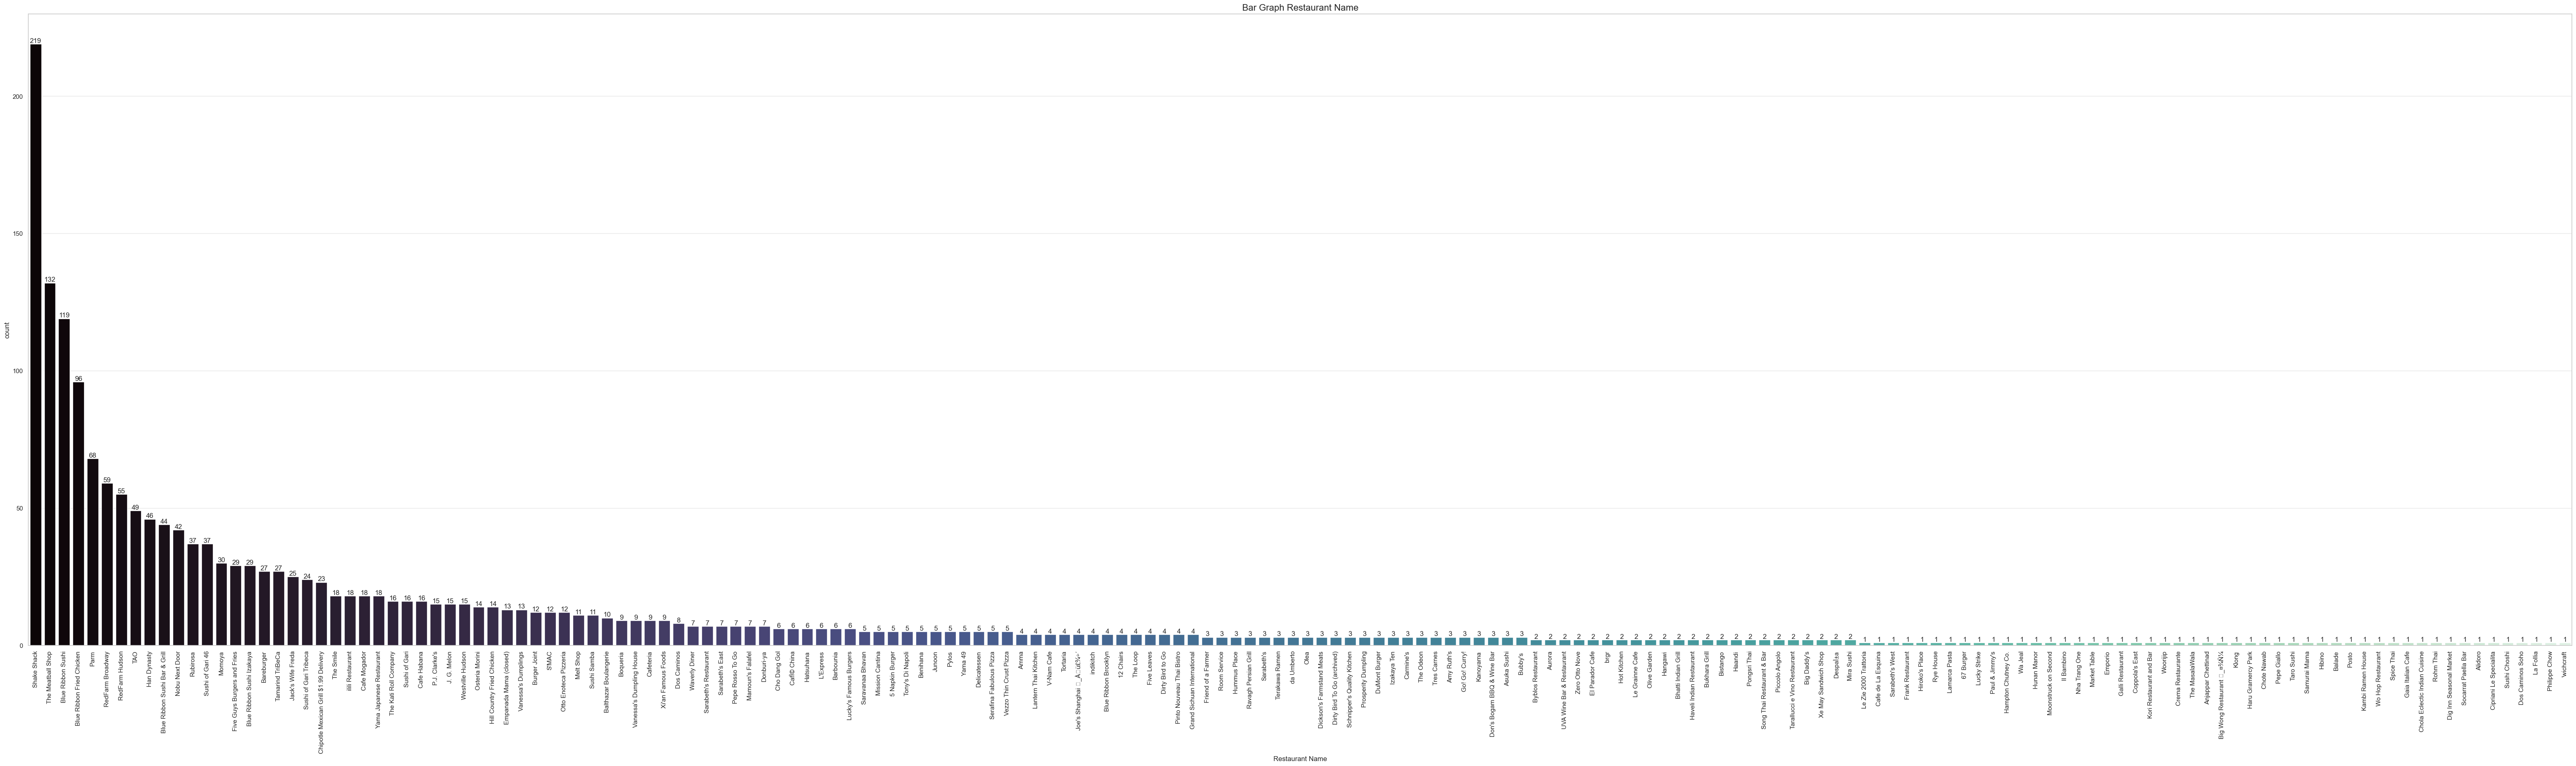

In [33]:
plt.figure(figsize=(80, 20))
# bargraph for catehorical variable 'restaurant_name' (string)
draw_countplot('restaurant_name', rot=90)

In [34]:
# As the restaurant_name is nominal data, here the unique values are a lot, so we can't get much insights from this graph.
# Hence let try to pick some priority restaurants and plot the graph again.

In [35]:
top_n = 10
# ? Series -> Top 10 restaurants with the highest demand (ie maximum orders)
top_restaurants_order_count = df['restaurant_name'].value_counts().nlargest(top_n)
tableit(top_restaurants_order_count)

+-------------------------------+---------+
| restaurant_name               |   value |
+===============================+=========+
| Shake Shack                   |     219 |
+-------------------------------+---------+
| The Meatball Shop             |     132 |
+-------------------------------+---------+
| Blue Ribbon Sushi             |     119 |
+-------------------------------+---------+
| Blue Ribbon Fried Chicken     |      96 |
+-------------------------------+---------+
| Parm                          |      68 |
+-------------------------------+---------+
| RedFarm Broadway              |      59 |
+-------------------------------+---------+
| RedFarm Hudson                |      55 |
+-------------------------------+---------+
| TAO                           |      49 |
+-------------------------------+---------+
| Han Dynasty                   |      46 |
+-------------------------------+---------+
| Blue Ribbon Sushi Bar & Grill |      44 |
+-------------------------------

In [36]:
top_restaurants_names = top_restaurants_order_count.index
list(top_restaurants_names)

['Shake Shack',
 'The Meatball Shop',
 'Blue Ribbon Sushi',
 'Blue Ribbon Fried Chicken',
 'Parm',
 'RedFarm Broadway',
 'RedFarm Hudson',
 'TAO',
 'Han Dynasty',
 'Blue Ribbon Sushi Bar & Grill']

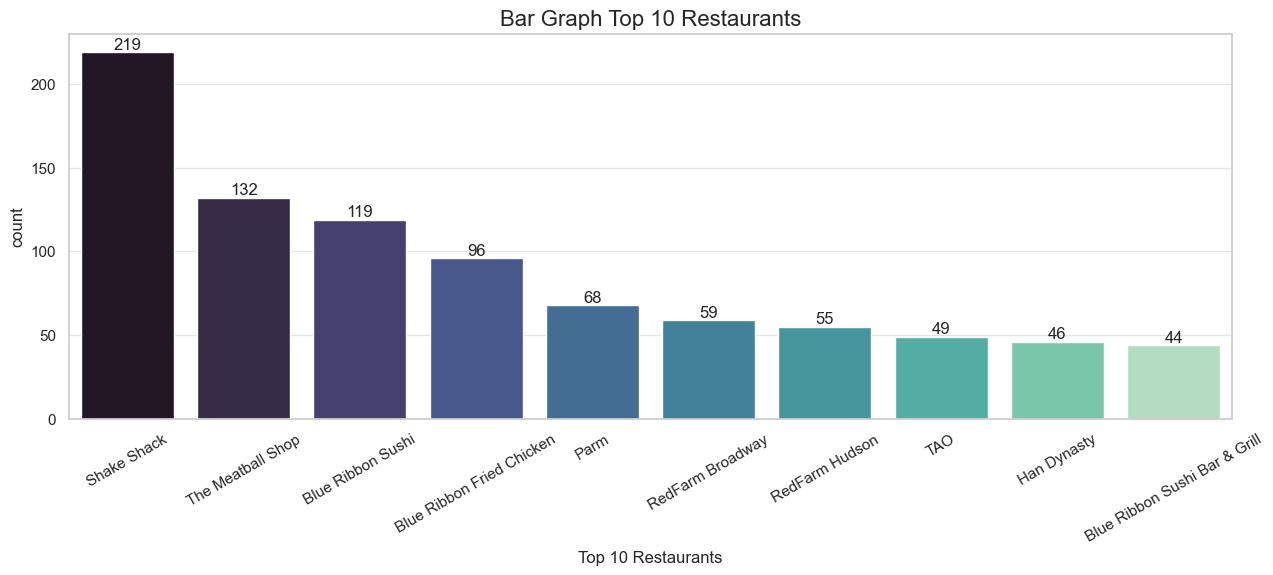

In [37]:
draw_countplot('restaurant_name', rot=30, name='Top 10 Restaurants', o=top_restaurants_order_count.index)

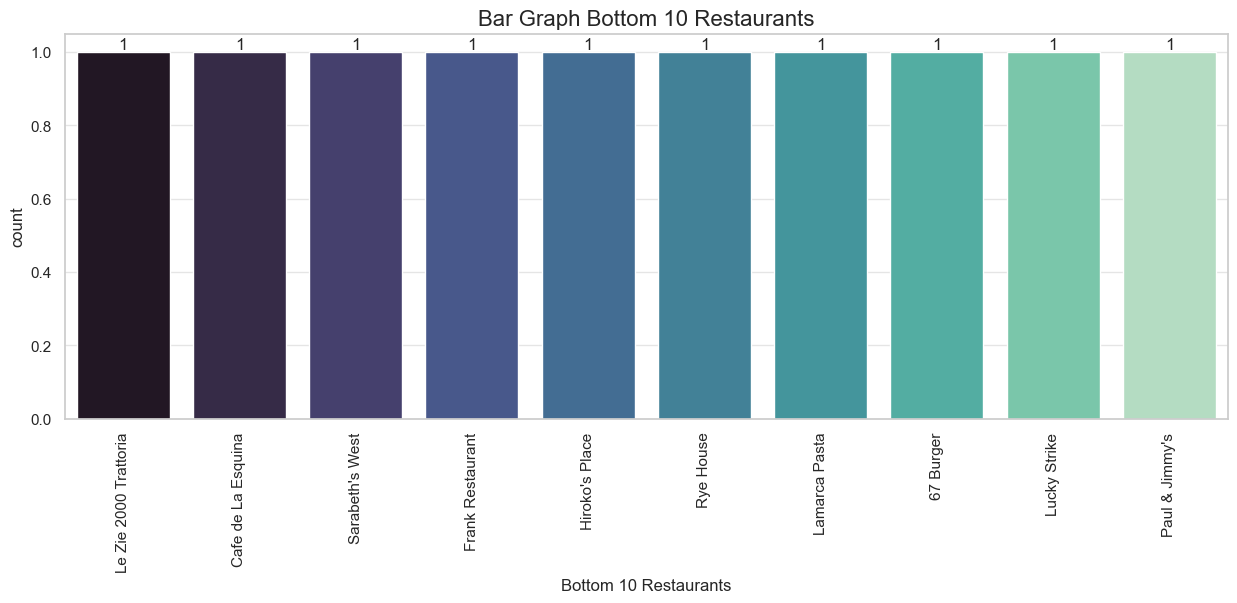

In [38]:
bottom_restaurants_order_count = df['restaurant_name'].value_counts().nsmallest(top_n)
draw_countplot('restaurant_name', rot=90, name='Bottom 10 Restaurants', o=bottom_restaurants_order_count.index)

Graph seems to be too cluttered due to too many categories, lets try to discard few of them

In [39]:
x = 'restaurant_name'
df[x].value_counts().describe()

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: restaurant_name, dtype: float64

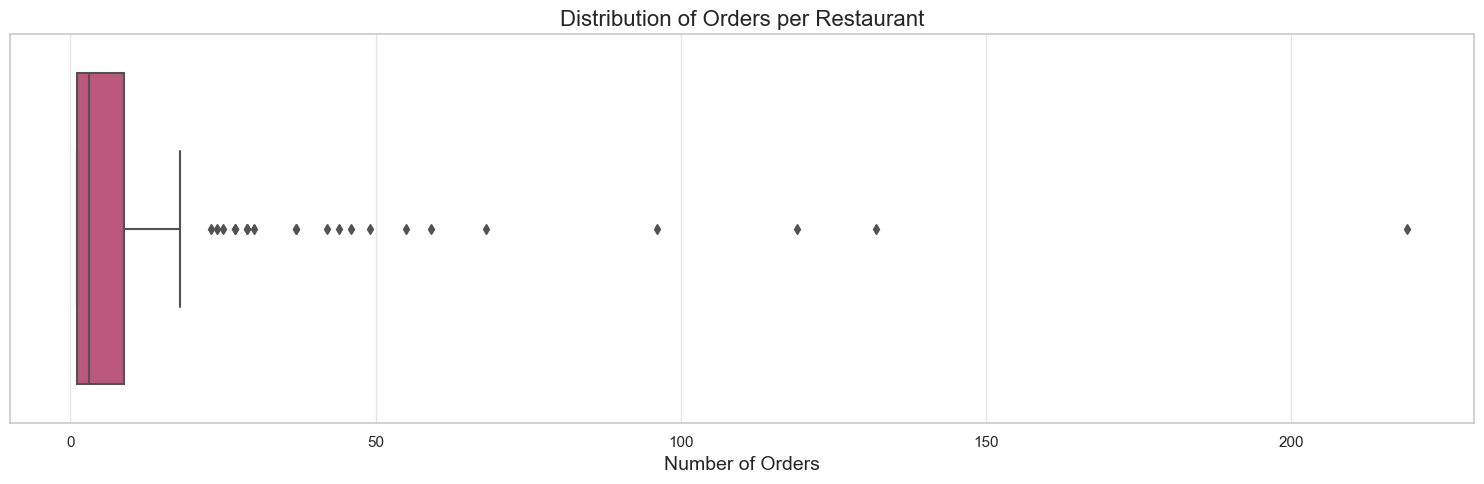

In [40]:
# Calculate the frequencies (order counts) for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Plot the boxplot for the frequencies
sns.boxplot(x=restaurant_order_counts, palette='plasma')

# Add a title and labels
plt.title('Distribution of Orders per Restaurant', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)

# Show the plot
plt.tight_layout()  # To avoid clipping of labels
plt.show()

In [41]:
def calc_iqr(ser):
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    return (Q1, Q3)

In [42]:
calc_iqr(restaurant_order_counts)

(1.0, 8.75)

In [43]:
# Step 1: Calculate the frequency of each restaurant in the original dataframe
restaurant_counts = df['restaurant_name'].value_counts()

# Step 2: Filter restaurants whose order count is more than 10
restaurants_with_more_than_10_orders = restaurant_counts[restaurant_counts > 10].index

# Step 3: Filter the original dataframe based on the above condition
filtered_df = df[df['restaurant_name'].isin(restaurants_with_more_than_10_orders)]

filtered_df.shape

(1494, 9)

In [44]:
df.shape

(1898, 9)

In [45]:
1898 - 1494, (404 / 1898) * 100

(404, 21.285563751317177)

Observation: Only 400 (ie approx 20%) restaurants have more than 10 orders

In [46]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

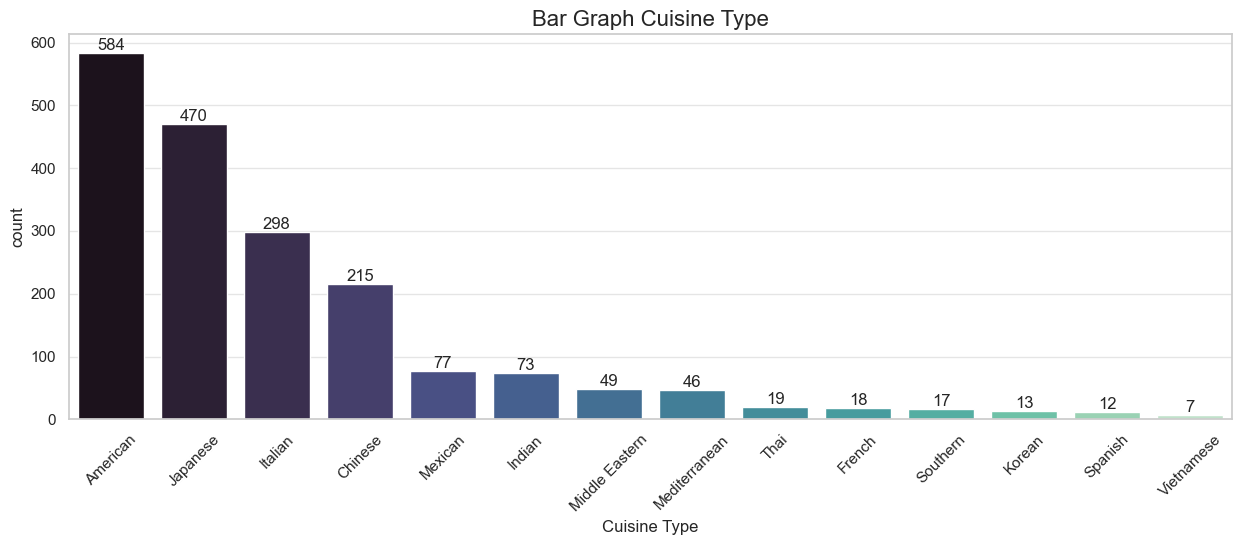

In [47]:
plt.figure(figsize=(15, 5))

draw_countplot('cuisine_type', rot=45)

In [48]:
# Observations:
# 1. The countplot for 'cuisine_type' shows the distribution of different types of cuisines in the dataset.
# 2. The most common cuisine types are American, Japanese, and Italian.
# 3. There are very fewer orders for cuisines like Korean, Spanish, and Vietnamese.
# 4. The distribution indicates a higher preference for certain cuisines among customers,
#  Hence restaurant should focus on such cuisines to attract more customers.

In [49]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Cost of the Orders

In [50]:
x = 'cost_of_the_order'

In [51]:
q1, q3 = calc_iqr(df[x])
q3-q1

10.2175

🔍 *Insights*:

The IQR for the cost of the order is 10.21 units

Half of all the orders cost somewhere between 10 units more or less than typical usual price, showing a moderate variation in how much customers are spending.

In [52]:
# HistoGram
def draw_histplot(x, bins="auto"):
    label = snake_to_pascal(x)
    sns.histplot(data=df, x=x, bins=bins, kde=True, color='teal')
    plt.title(f'Histogram of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('frequeuncy', fontsize=12)
    plt.show()

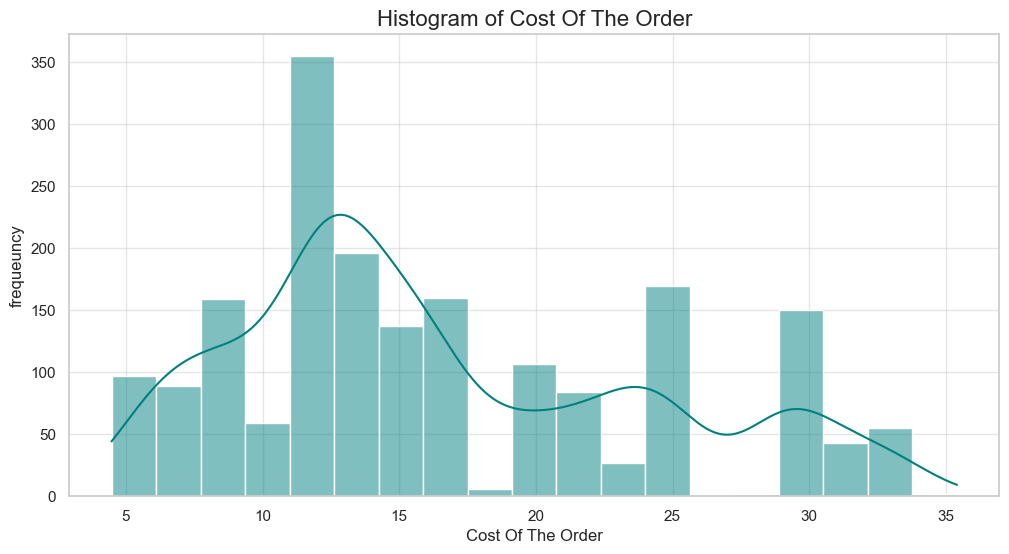

In [53]:
plt.figure(figsize=(12, 6))
draw_histplot(x)

In [54]:
# Observations:
# 1. The histogram for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The distribution appears to be right-skewed, indicating that most orders are relatively inexpensive, with fewer high-cost orders.
# 3. The majority of orders cost between $10 and $20.
# 4. There are some outliers with significantly higher costs, which could be due to large or multiple orders.
# 5. The presence of a KDE (Kernel Density Estimate) line helps visualize the probability density of the order costs.

In [55]:
# Box Plot
def draw_boxplot(x):
    label = snake_to_pascal(x)
    sns.boxplot(data=df, x=x)
    plt.title(f'Boxplot of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.show()

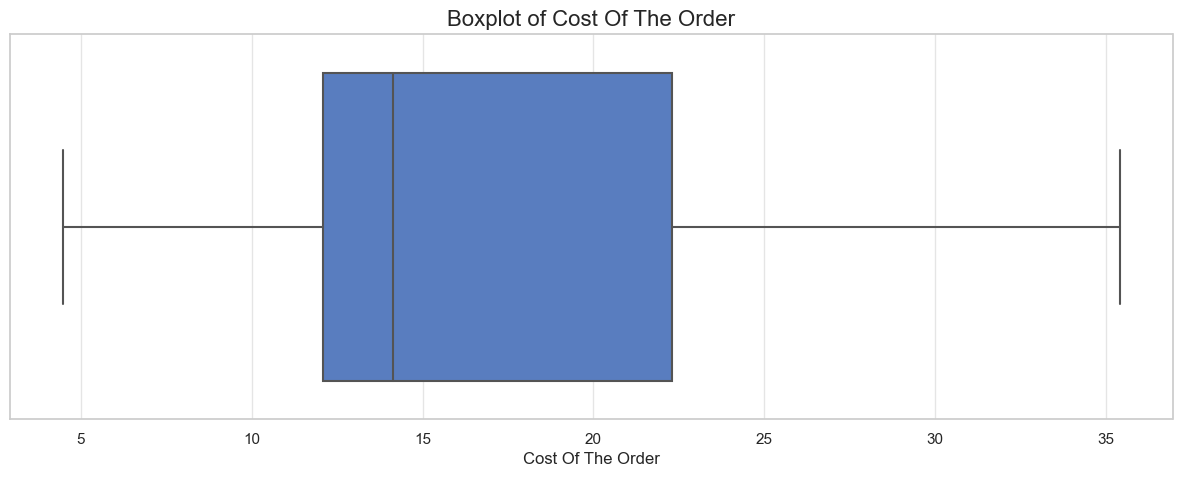

In [56]:
draw_boxplot(x)

(Maybe this can be kept with calc_iqr() analysis)

In [57]:
# Observations:
# 1. The boxplot for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The median cost of the orders is around 15 units.
# 3. The interquartile range (IQR) is approximately 10 units, indicating that the middle 50% of the orders cost between 12.08 and 22.30 units.
# 4. There are several outliers with higher costs, which could be due to large or multiple orders.
# 5. The presence of outliers suggests that while most orders are within a certain range, there are some orders that are significantly more expensive.

Obsv.

The boxplot for 'Cost of the Order' reveals that the average order costs about 15 units, with most orders falling between 12.08 and 22.30 units. This means that half of the orders are within this price range. However, there are a few orders that are much more expensive, likely due to larger or multiple items being ordered. This shows that while most people are placing affordable orders, some orders can be significantly higher in cost.

In [58]:
#Descriptive Statistics
print(df['cost_of_the_order'].describe(), end='\n\n')

# deeper insights into distribution shape
print(f"skewness: {df['cost_of_the_order'].skew()}")
print(f"kurtosis: {df['cost_of_the_order'].kurt()}")

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

skewness: 0.6217469995871637
kurtosis: -0.6078508734318953


In [59]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [60]:
x = 'day_of_the_week'

In [61]:
# Descriptive Statistics
day_counts = df['day_of_the_week'].value_counts()
day_counts_pct = df['day_of_the_week'].value_counts(normalize=True) * 100

print('Order Counts by Day of the Week:', day_counts, sep='\n')
print('\nPercentage of Orders by Day of the Week:', day_counts_pct, sep='\n')

Order Counts by Day of the Week:
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Percentage of Orders by Day of the Week:
Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64


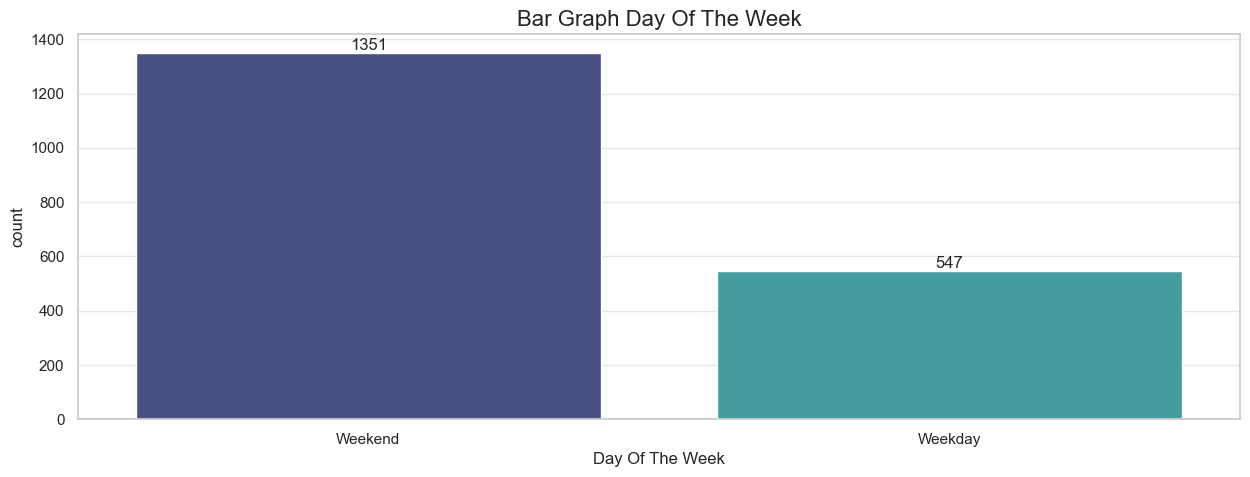

In [62]:
draw_countplot(x)

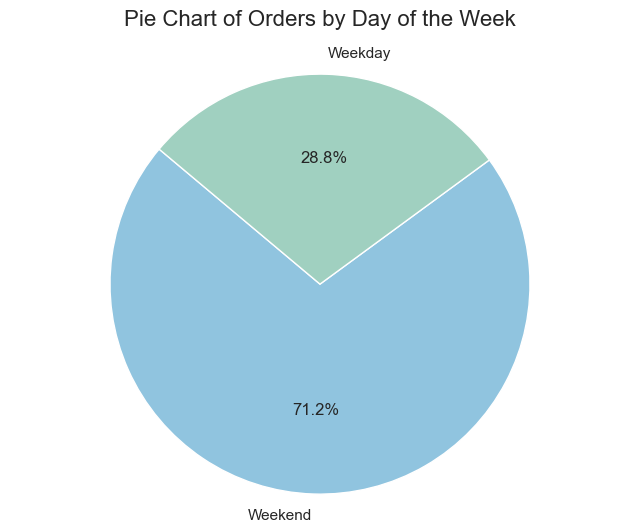

In [63]:
# draw pie chart for day of the week
plt.figure(figsize=(8, 6))
plt.title('Pie Chart of Orders by Day of the Week', fontsize=16, pad=20)
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=['#90c4df', '#a0d0c0'])
plt.axis('equal')
plt.show()

In [64]:
# Observations:
# 1. The pie chart for 'Orders by Day of the Week' shows the distribution of orders between weekdays and weekends.
# 2. The majority of orders are placed on weekends, accounting for approximately 71.2% of the total orders.
# 3. Weekday orders make up the remaining 28.8% of the total orders.
# 4. This indicates a higher demand for food orders during weekends compared to weekdays.
# 5. Restaurants may consider increasing their staff and resources during weekends to handle the higher volume of orders.

In [65]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [66]:
pie_colors_domain = ['#90c4df', '#a0d0c0', '#FF9999FF', '#8F9DDDFF', '#99D3FFFF', '#D370DEFF', '#FFC099FF', '#FF99D8FF', '#8DE5BAFF',  '#FFD699FF', '#A199FFFF']
def draw_pieplot(x):
    label = snake_to_pascal(x)
    counts = df[x].value_counts()
    plt.figure(figsize=(8, 6))
    c = pie_colors_domain[:len(counts)]
    plt.title(f'Pie Chart of {label}', fontsize=16, pad=20)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=c)
    plt.axis('equal')
    plt.show()

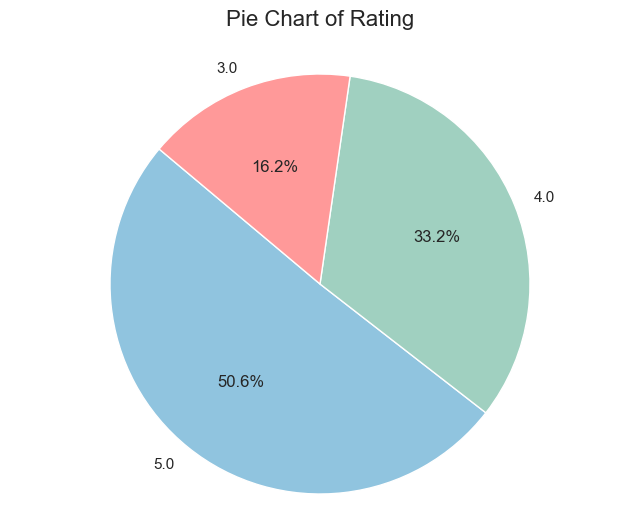

In [67]:
x = 'rating'
draw_pieplot(x)

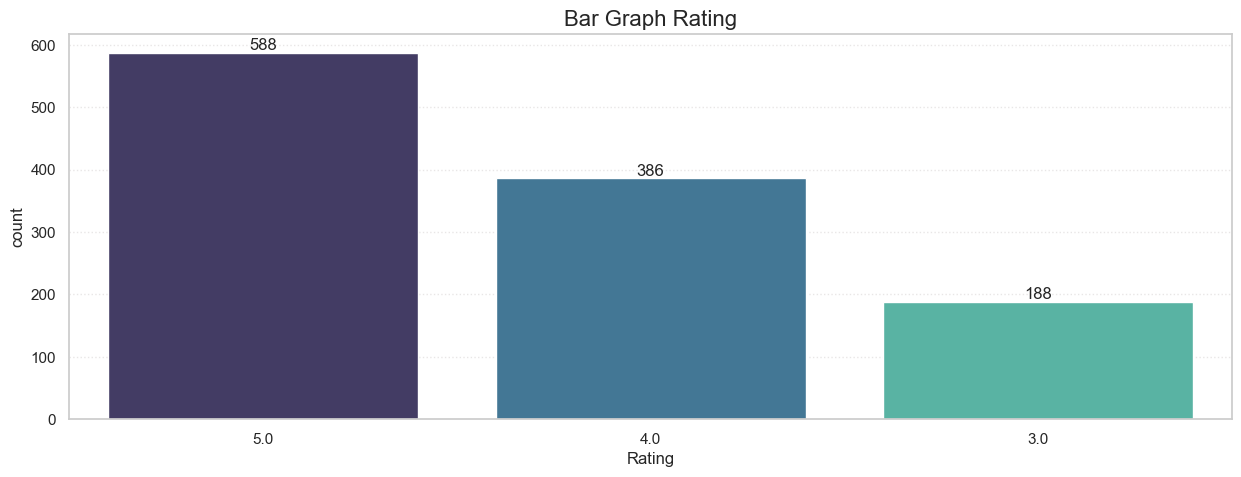

In [68]:
sns.set_style('whitegrid', {"grid.color": "#D3CECEFF", "grid.linestyle": ":"})
draw_countplot(x)

In [69]:
df[x].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [70]:
# Note; here null is same as "Not given" as we have already converted "Not given" to NaN
ratings_not_given = df[x].isnull().sum()
ratings_not_given

736

In [71]:
# Observations:
# 1. The pie chart for 'Rating' shows the distribution of ratings given by customers.
# 2. A significant portion of the ratings are 'Not given', indicating that many customers did not provide a rating.
# 3. Among the given ratings, the most common rating is 5, followed by 4 and 3.
# 4. The distribution suggests that customers who do rate their orders tend to give higher ratings.
# 5. The presence of many 'Not given' ratings could indicate a need for encouraging customers to provide feedback.

#The pie chart for 'Rating' shows that many customers didn't provide a rating, as indicated by the significant portion marked as 'Not given'. Among the ratings that were given, the most common is a 5, followed by 4 and 3. This suggests that customers who do leave ratings generally tend to give high scores. The large number of 'Not given' ratings highlights the potential opportunity for the company to encourage more customers to share their feedback.

In [72]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [129]:
x = 'food_preparation_time'

In [130]:
# descriptive statistics for 'food_preparation_time' column
food_preparation_time_summary = df[x].describe()
food_preparation_time_summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [131]:
df[x].nunique()

16

This indicates preparation times could be discrete

In [132]:
# Just for understanding (Dont include in actual nb)
# frequency of each food preparation time
food_preparation_time_counts = df[x].value_counts()
food_preparation_time_counts_pct = df[x].value_counts(normalize=True) * 100

print('Food Preparation Time Counts:', food_preparation_time_counts, sep='\n')

Food Preparation Time Counts:
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64


In [133]:
print('\nPercentage of Food Preparation Time:', food_preparation_time_counts_pct, sep='\n')


Percentage of Food Preparation Time:
21    7.112750
23    6.480506
27    6.480506
22    6.480506
28    6.375132
24    6.375132
20    6.269758
30    6.269758
33    6.217071
35    6.164384
31    6.111697
26    6.059009
25    5.953635
34    5.953635
32    5.953635
29    5.742887
Name: food_preparation_time, dtype: float64


In [134]:
# Display the percentage distribution of food preparation times
# Just for understanding (Dont include in actual nb)
print(food_preparation_time_counts_pct)

# Consider this obsv.
# Observations:
# 1. The food preparation times are fairly evenly distributed across the different time slots.
# 2. The most common preparation time is 21 minutes, accounting for approximately 7.11% of the orders.
# 5. The distribution suggests that most orders are prepared within a range of 20 to 35 minutes, with no single time slot dominating the distribution.
# 6. This consistency in preparation times indicates that restaurants have a standardized process for preparing orders, leading to predictable and reliable preparation times for customers.

21    7.112750
23    6.480506
27    6.480506
22    6.480506
28    6.375132
24    6.375132
20    6.269758
30    6.269758
33    6.217071
35    6.164384
31    6.111697
26    6.059009
25    5.953635
34    5.953635
32    5.953635
29    5.742887
Name: food_preparation_time, dtype: float64


Observatio Note 

The 'Food Preparation Time' column contains only 16 unique values, meaning that the time it takes for restaurants to prepare orders is fairly consistent. This could suggest that most restaurants have similar preparation times for their orders, or they may follow a standard process for preparing meals. It also indicates that there aren't many variations in how long it takes to prepare food across different orders.

The distribution of 'Food Preparation Time' shows that most orders are prepared within a time frame of 20 to 35 minutes.

Obsv.
The 'Food Preparation Time' column contains only 16 unique values, meaning that the time it takes for restaurants to prepare orders is fairly consistent. This could suggest that most restaurants have similar preparation times for their orders, or they may follow a standard process for preparing meals. It also indicates that there aren't many variations in how long it takes to prepare food across different orders.

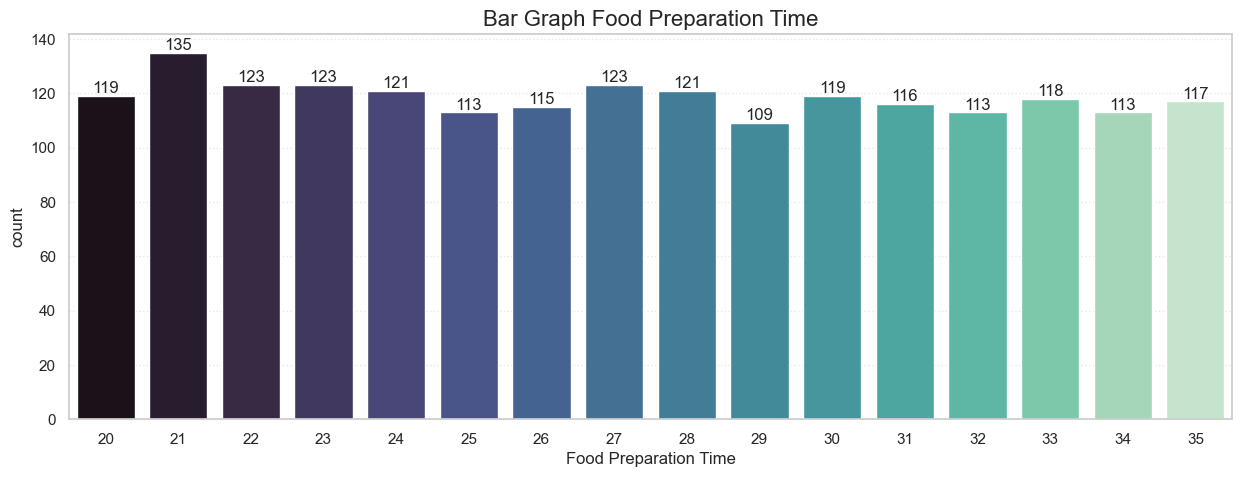

In [139]:
draw_countplot(x, sort=False)

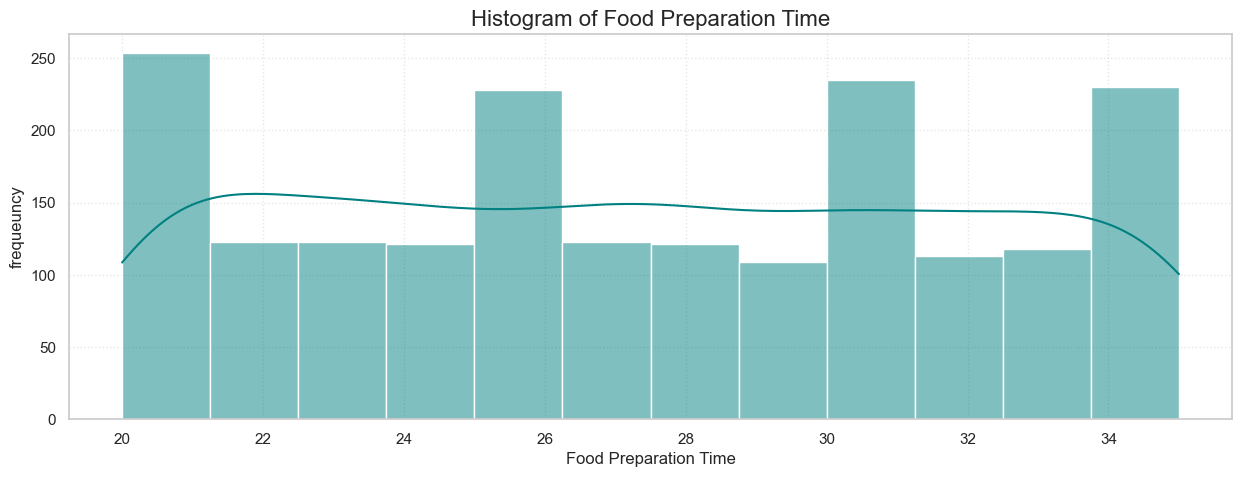

In [136]:
draw_histplot('food_preparation_time')

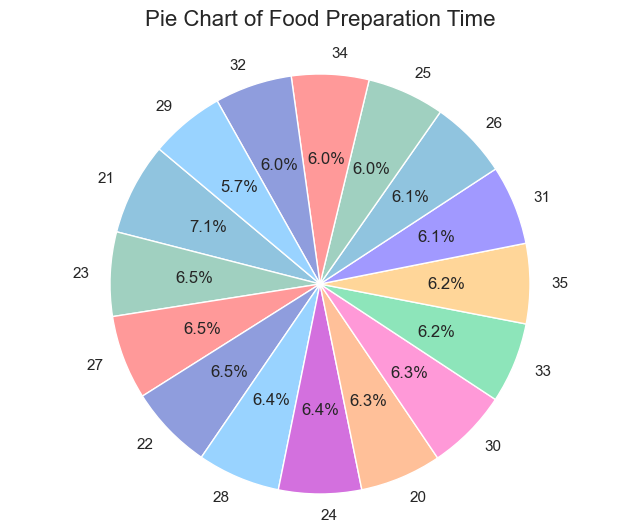

In [137]:
draw_pieplot(x)

Time is in Mins

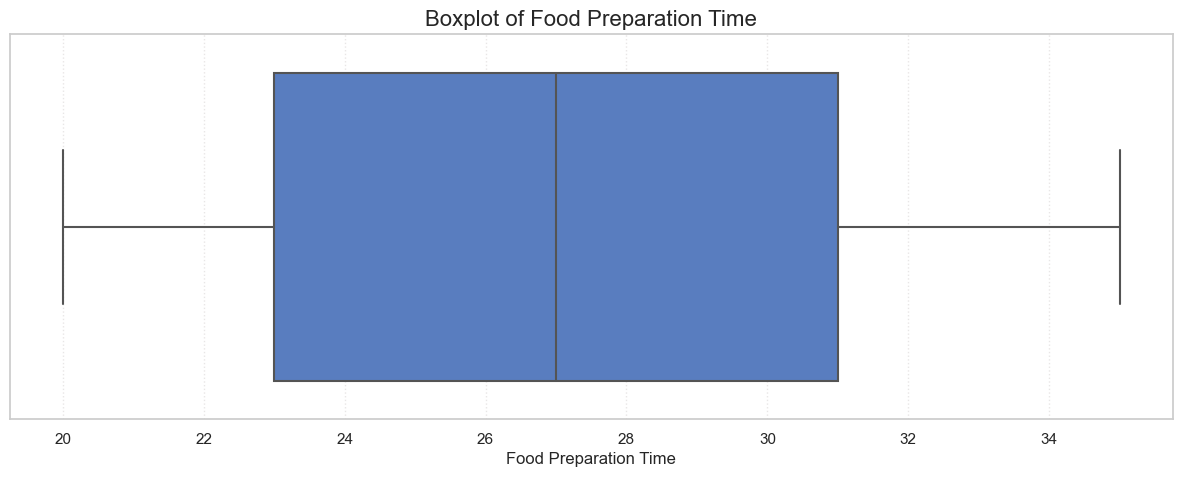

In [138]:
draw_boxplot(x)

In [82]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [83]:
x = 'delivery_time'
df[x].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [84]:
# frequency of each delivery time
delivery_time_counts = df[x].value_counts()
delivery_time_counts.shape

(19,)

In [85]:
# Observations:
# 1. The 'delivery_time' column contains 1898 entries, indicating that there are no missing values for this feature.
# 2. The average delivery time is approximately 24.16 minutes.
# 3. The standard deviation is around 4.97 minutes, indicating some variability in delivery times.
# 4. The minimum delivery time is 15 minutes.
# 5. The 25th percentile (Q1) is 20 minutes, meaning 25% of the orders have a delivery time of 20 minutes or less.
# 6. The median (50th percentile) delivery time is 25 minutes.
# 7. The 75th percentile (Q3) is 28 minutes, meaning 25% of the orders have a delivery time of 28 minutes or more.
# 8. The maximum delivery time is 33 minutes.

# Interpretation:
# 25% of the deliveries are very fast, taking only 20 minutes or less,
# 50% of the deliveries take 28 minutes or less

# *** IMPORTANT ***
# On average, deliveries take about 24 minutes, with most orders falling between 20 and 28 minutes.
# While the fastest deliveries are completed in 15 minutes, some take up to 33 minutes.
# The slight variability in delivery time (around 5 minutes) suggests a consistent but slightly flexible pace across delivery services.

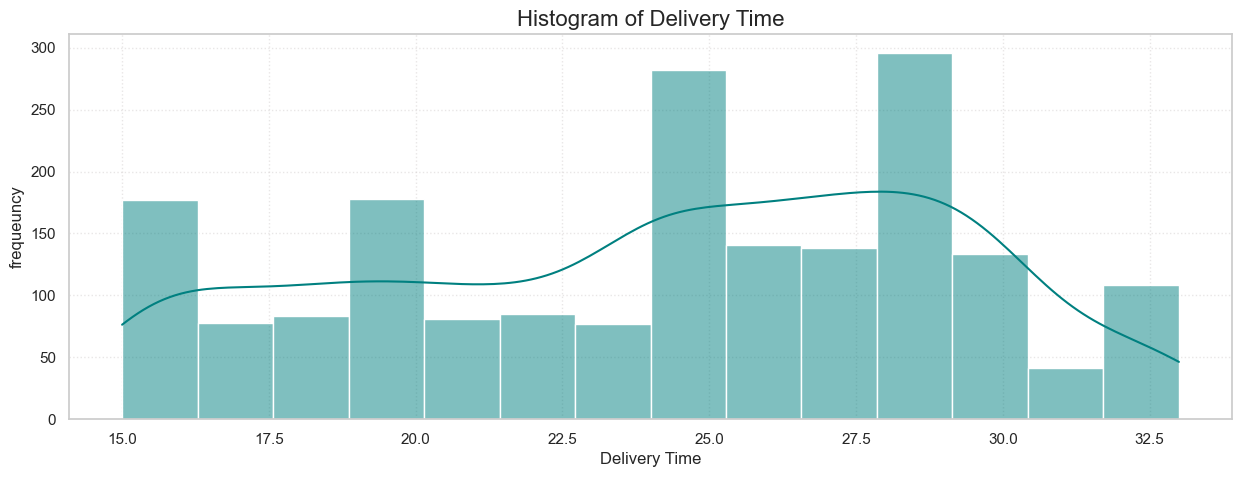

In [86]:
draw_histplot(x)

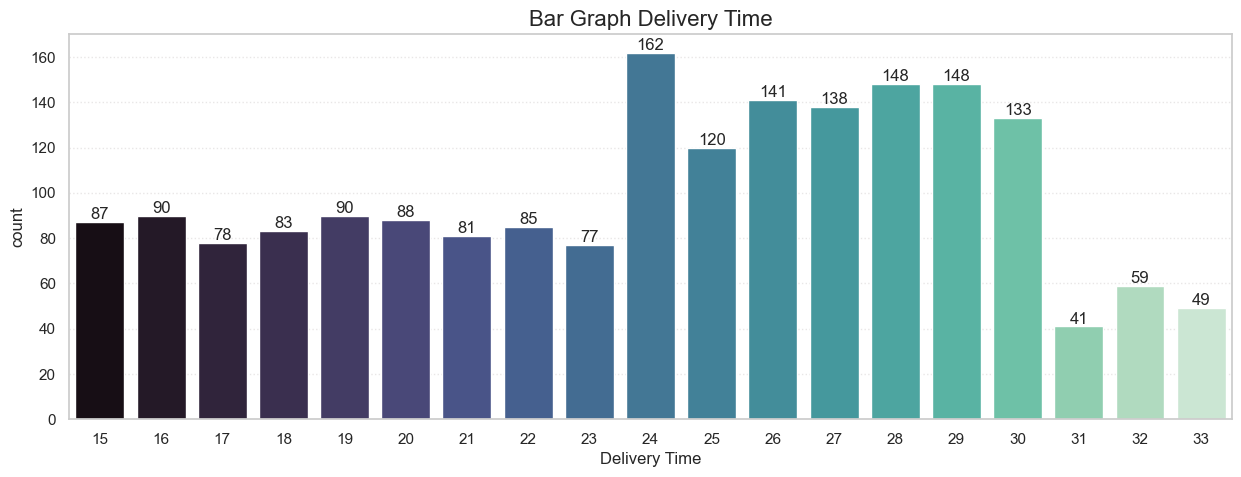

In [87]:
# As here time is more important, we are not showing bars in sorted fashion
draw_countplot(x, sort=False)

In [88]:
# Q7.
# write code to find top 5 restauranrs in terms of orderes recieved
k = 5
# NOTE: The resulting object will be in descending order so that the first element is the most frequently-occurring element.
top_restaurants_orderscount = df['restaurant_name'].value_counts().head(5)
top_restaurants_orderscount

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [89]:
# Q8  Popuplar Cuisine on Weekend
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_order_count = weekend_orders['cuisine_type'].value_counts().head(1)
popular_cuisine_order_count


American    415
Name: cuisine_type, dtype: int64

In [90]:
total_orders = df.shape[0]
popular_cuisine_pct = (popular_cuisine_order_count / total_orders) * 100
popular_cuisine_pct

American    21.865121
Name: cuisine_type, dtype: float64

In [91]:
# Observations:
# The most popular cuisine type on weekends is American, with a total of 415 orders.
# This indicates a strong preference for American cuisine among customers during weekends.
# Restaurants offering American cuisine may experience higher demand on weekends and should be prepared to handle the increased volume of orders.

In [92]:
# Q9. % order more than 20
# Create a mask for orders with cost greater than 20
mask_cost_above_20 = df['cost_of_the_order'] > 20
percent_of_order_above_20 = mask_cost_above_20.mean() * 100
percent_of_order_above_20

29.24130663856691

In [93]:
# Observation:
# Approximately 29.24% of the orders have a cost greater than 20 units.
# This indicates that nearly one-third of the orders are relatively high-cost, suggesting that a significant portion of customers are willing to spend more on their food orders.

In [94]:
#Q10 find rows with avg rating greater than 4 and total rating count more than 50
df['delivery_time'].mean()


24.161749209694417

In [95]:
#Q11.
# find the top 5 customers with maximum orders placed
top_customers = df['customer_id'].value_counts().head(3)
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['customer_id', 'order_count']
top_customers_df

customer_id  order_count
0        52832           13
1        47440           10
2        83287            9

#### BiVariate Analysis

#### Demand Analysis

Restaurant name and cuisien type

In [96]:
def plot_countplot_b(x, y, data, name=None):
    label = name if name else snake_to_pascal(x)
    ax = sns.countplot(data=data, x=x, hue=y, palette='mako')
    ax.bar_label(ax.containers[0])
    plt.title(f'Bar Graph of {label} by {y}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.show()

**1 Cuisine Type and Day of Week**

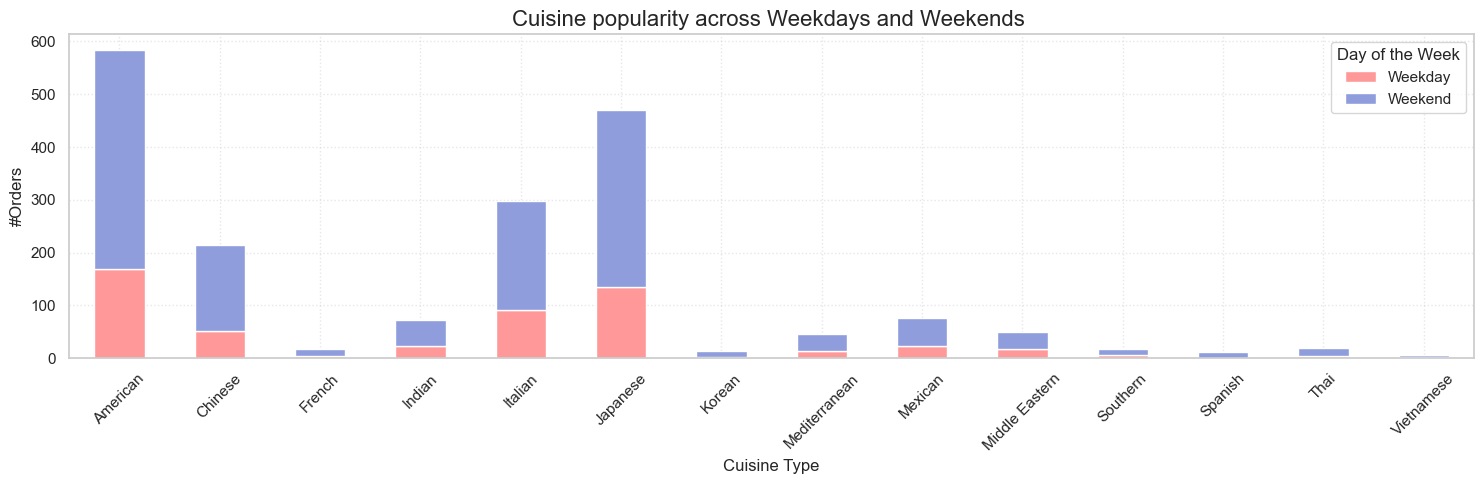

In [97]:
# TODO: Just for understanding (Dont include in actual nb)
# Include if want to inclue

# stacked bar graph
x = 'cuisine_type'
y = 'day_of_the_week'
# create a cross tab to aggregate data
cuisine_day_data = pd.crosstab(df[x], df[y])

# plot stacjed bar graph
#plt.figure(figsize=(12, 6))
cuisine_day_data.plot(kind='bar', stacked=True, color=['#FF9999FF', '#8F9DDDFF'])

# add titles and labels
plt.title('Cuisine popularity across Weekdays and Weekends ', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('#Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.tight_layout()

# show the plot
%matplotlib inline
plt.show()

In [98]:
# Observations:

#1. The data indicates a general trend of higher demand for various cuisines during weekends, suggesting that customers are more likely to order food during weekends.
#2. Restaurants may consider increasing their inventory and staffing on weekends to accommodate the higher volume of orders.

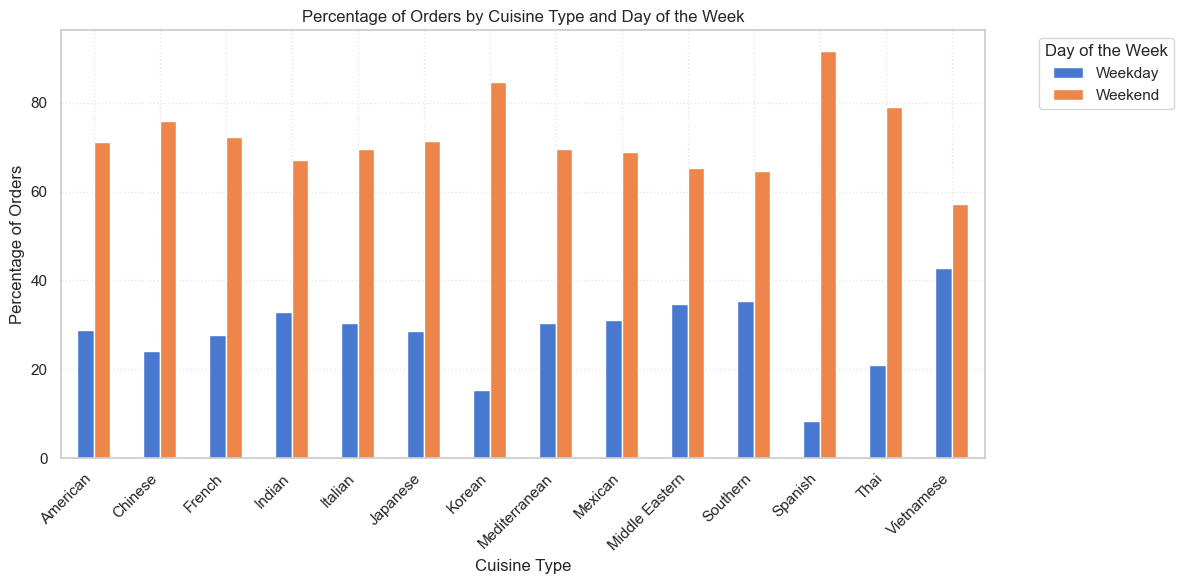

In [99]:
# TODO: Just for understanding (Dont include in actual nb)
# Grouped bar Plot

# Dont include this variant but include (Stacked one)

# Calculate the count of orders for each cuisine_type and day_of_the_week
order_counts = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

# Normalize to get percentages
order_percentages = order_counts.div(order_counts.sum(axis=1), axis=0) * 100

# Plot the grouped bar plot
order_percentages.plot(kind='bar', stacked=False, figsize=(12, 6))

# Customize the plot
plt.title('Percentage of Orders by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

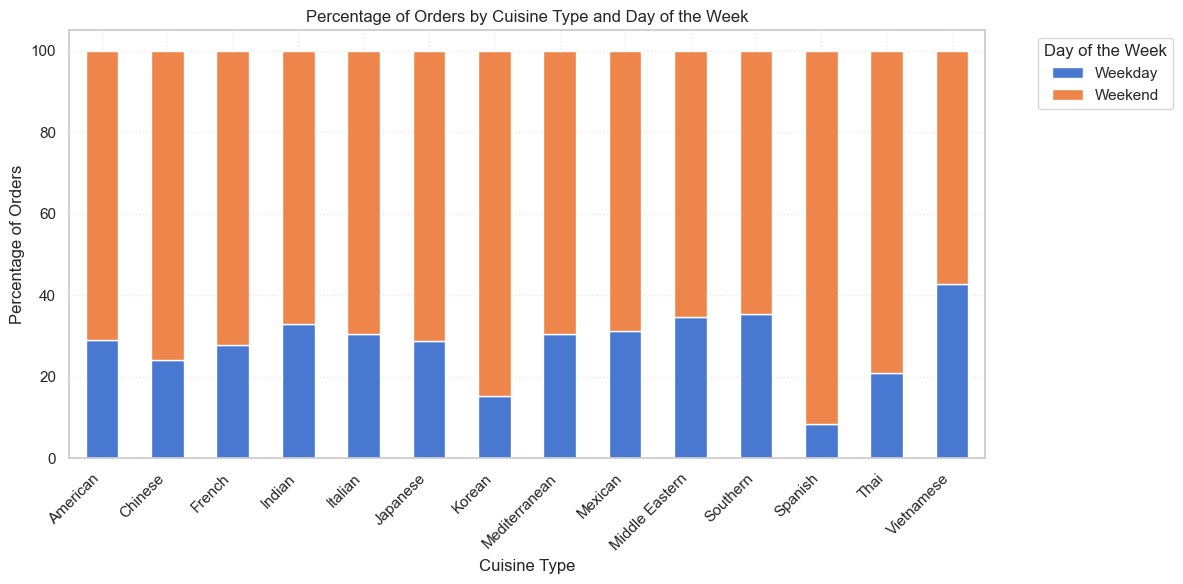

In [100]:
# Stacjed Plot (Consider THis)

# Calculate the count of orders for each cuisine_type and day_of_the_week
order_counts = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

# Normalize to get percentages
order_percentages = order_counts.div(order_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar plot
order_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Percentage of Orders by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Observations:

- Most cuisines show a higher demand on weekends compared to weekdays, indicating that customers are more likely to order food during weekends. Restaurants may consider increasing their inventory and staffing on weekends to accommodate the higher volume of orders.

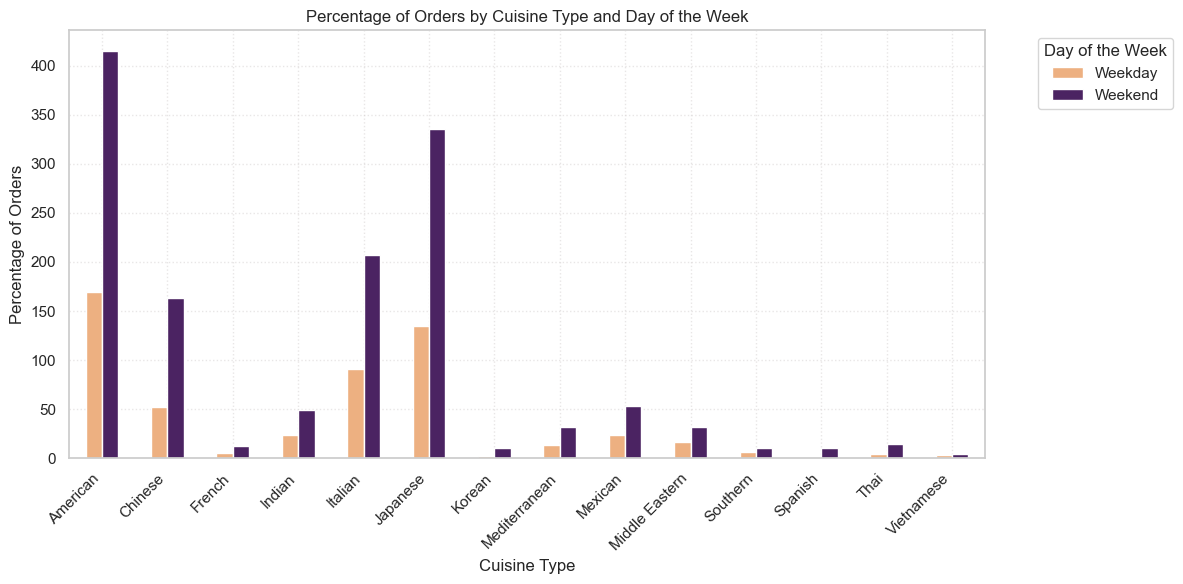

In [101]:
# TODO: Just for understanding (Dont include in actual nb)
# Grouped bar Plot

# Dont include this variant but include (Stacked one)

# Calculate the count of orders for each cuisine_type and day_of_the_week
order_counts = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

# # Normalize to get percentages
# order_percentages = order_counts.div(order_counts.sum(axis=1), axis=0) * 100

# Plot the grouped bar plot
order_counts.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='flare')

# Customize the plot
plt.title('Percentage of Orders by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Observations:

1. American cuisine has the highest number of orders, with a significant increase during weekends.
2. Japanese cuisine is also popular, with a higher demand on weekends.
3. Chinese and Italian cuisines follow, showing a similar trend of increased orders on weekends.
4. Other cuisines like French, Indian, and Mediterranean have relatively fewer orders but still show a weekend preference.
5. The data indicates a general trend of higher demand for various cuisines during weekends, suggesting that customers are more likely to order food during weekends.
6. Restaurants may consider increasing their inventory and staffing on weekends to accommodate the higher volume of orders.

In [102]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [103]:
# NOT To include

# get chinese cuisine order count on weekdays
def get_cuisine_day_order_count(cuisine, day):
    return df[(df['cuisine_type'] == cuisine) & (df['day_of_the_week'] == day)].shape[0]

chinese_weekdays = get_cuisine_day_order_count('Chinese', 'Weekday')
chinese_weekends = get_cuisine_day_order_count('Chinese', 'Weekend')
chinese_weekdays, chinese_weekends

(52, 163)

**2. Customer Ratings & Cost of the Order**

(This can provide insights into whether customers tend to rate more expensive orders differently than cheaper ones)

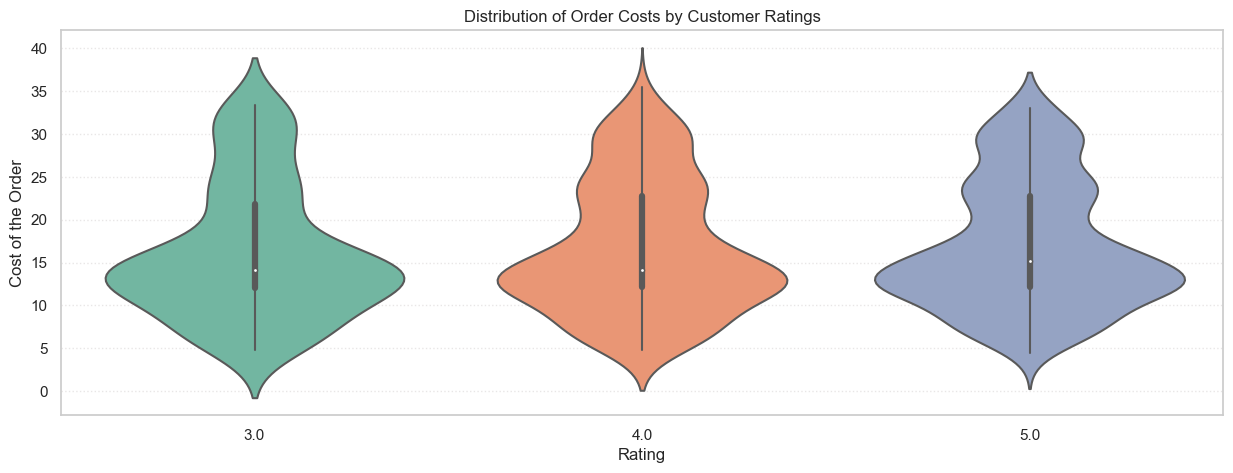

In [104]:
#plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='rating', y='cost_of_the_order', palette='Set2')
plt.title('Distribution of Order Costs by Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

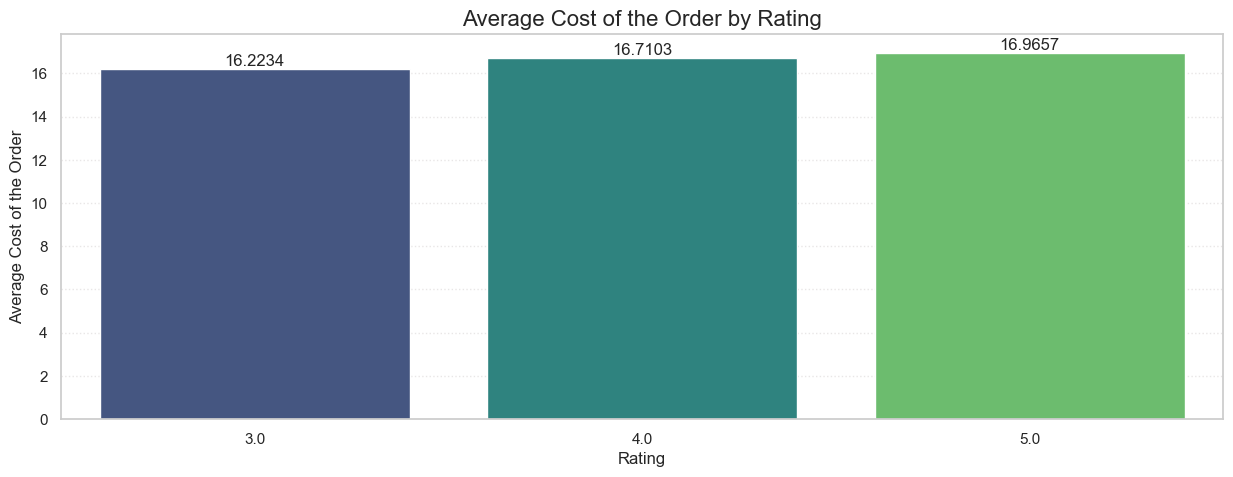

In [105]:
# calculate average cost for each rating
avg_cost_by_rating = df.groupby('rating')['cost_of_the_order'].mean().reset_index()

# create a bar plot to show the average cost for each rating
#plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_cost_by_rating, x='rating', y='cost_of_the_order', palette='viridis')

# add count above each bar
ax.bar_label(ax.containers[0])

# Add title and labels
plt.title('Average Cost of the Order by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Cost of the Order', fontsize=12)

# Show the plot
plt.show()

In [106]:
avg_cost_by_rating = original_df.groupby('rating')['cost_of_the_order'].mean().reset_index()
avg_cost_by_rating

rating  cost_of_the_order
0          3          16.223351
1          4          16.710337
2          5          16.965697
3  Not given          16.085340

This suggests that cost of an order does not vary significantly based on the rating given by the customer. In other words, whether the customer gives a high or low rating, the average amount spent on orders remains relatively consistent. This could further imply that pricing of the orders is independent of customer satisfaction, or there may be a broad range of pricing within each rating group

The average cost appears to be almost identical across all ratings. Additionally, event when ratings were not provided, the average cost remains consistent. This indicates cost is independent of customer feedback.

Recommendations : 

- Focus on improving non-cost-related aspects like food presentation, freshness, delivery accuracy, and speed.
- Encourage customers to leave feedback on what they enjoyed or disliked about their experience to identify areas for improvement.
- Consider adding value to the customer experience through small gestures like complimentary items or personalized notes, which could help boost ratings without impacting average costs.

In [107]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

**3. Day of Week & Delivery Time**

In [108]:
x = 'day_of_the_week'
y = 'delivery_time'
df[x].nunique(), df[y].nunique()

(2, 19)

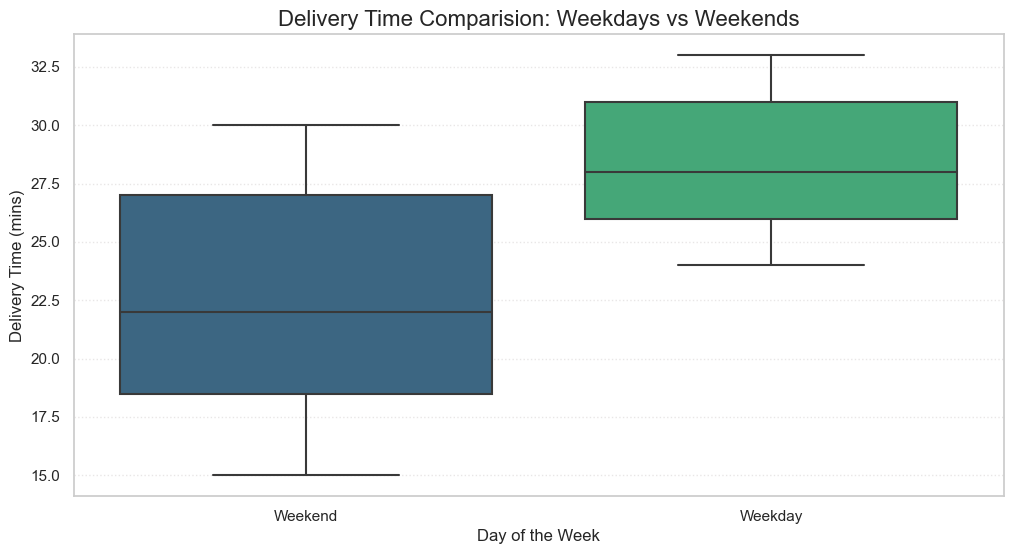

In [109]:
# box plot between day of the week and delivery time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=x, y=y, palette='viridis')

# add title and labels
plt.title('Delivery Time Comparision: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Delivery Time (mins)', fontsize=12)

# show the plot
plt.show()

In [140]:
# calculate median time for each day of the week
median_delivery_time = df.groupby('day_of_the_week')['delivery_time'].median().reset_index()
median_delivery_time

day_of_the_week  delivery_time
0         Weekday           28.0
1         Weekend           22.0

Observation:
Delivery times on weekdays tend to be higher and more spread out compared to weekends,
where they are generally faster and more consistent.
This could suggest that weekend orders may be handled more efficiently or have less traffic,
while weekdays could experience more delays or variability, possibly due to increased order volume or delivery congestion.

In [111]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

**4 Rating and Delivery Time**

(This will help us understand if higher or lower ratings are associated with faster or slower delivery times.)

In [112]:
x = 'rating'
y = 'delivery_time'
df[x].nunique(), df[y].nunique()

(3, 19)

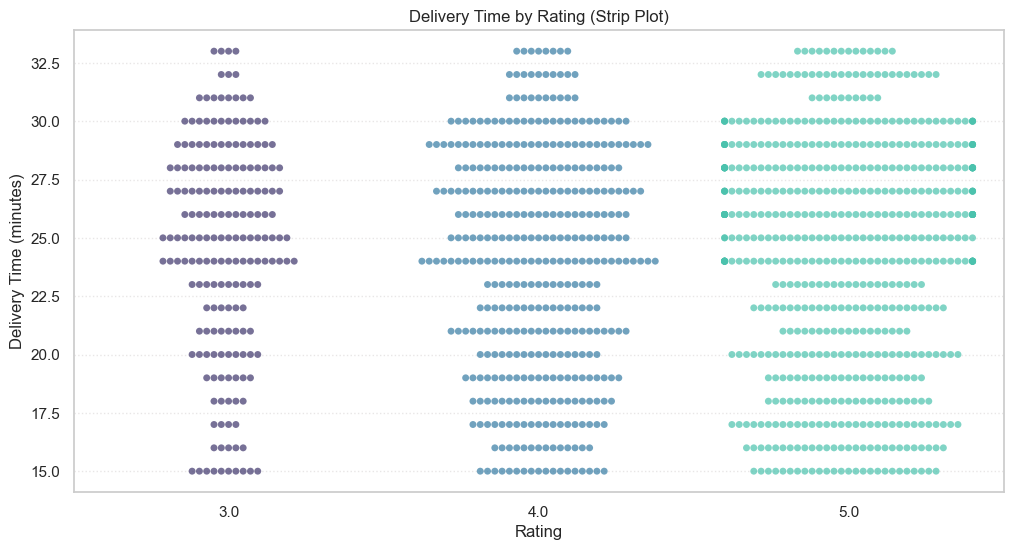

In [113]:
plt.figure(figsize=(12, 6))

# Drop rows with NaN values in the 'rating' column
df_clean = df.dropna(subset=['rating'])

#sns.stripplot(data=df_clean, x='rating', y='delivery_time', palette='ma', jitter=True, alpha=0.7)
sns.swarmplot(data=df_clean, x='rating', y='delivery_time', palette='mako', alpha=0.7)

plt.title('Delivery Time by Rating (Strip Plot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

Here we get good idea about density of ratings around particular Delivery Time (minutes) value, available at hand !!
<br>
Because we use swarm plot we will get better idea about width (ie spread) of ratings distribution acrosss each delivery time stamp 

Quick Observation 

Most of orders are delivered in 20 to 30 mins, regardless of ratings

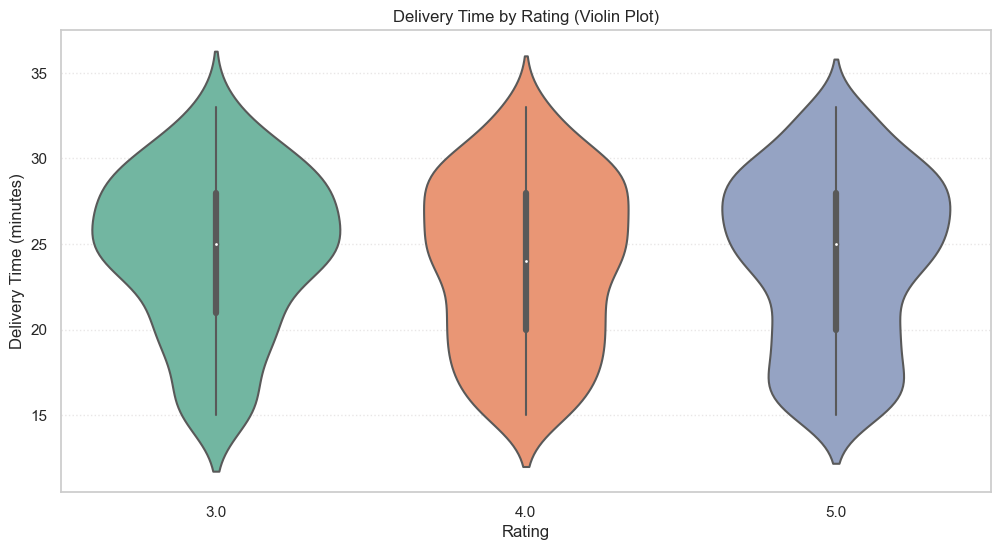

In [114]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='rating', y='delivery_time', palette='Set2')
plt.title('Delivery Time by Rating (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

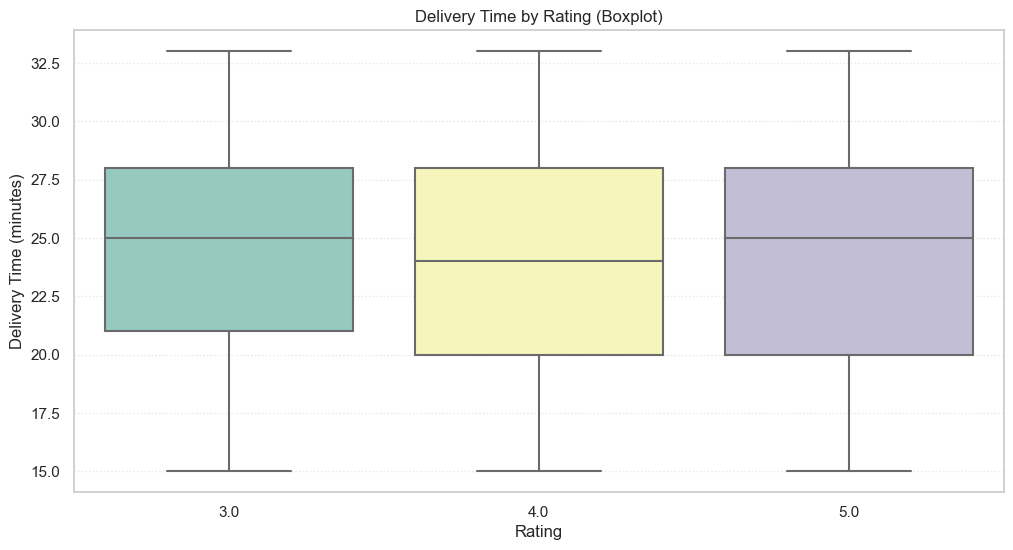

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rating', y='delivery_time', palette='Set3')
plt.title('Delivery Time by Rating (Boxplot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()


In [116]:
avg_delivery_time_by_rating = df.groupby('rating')['delivery_time'].mean().reset_index()
avg_delivery_time_by_rating

rating  delivery_time
0     3.0      24.558511
1     4.0      23.867876
2     5.0      24.212585

Observation:
The average delivery time by rating shows that the delivery times are relatively consistent across different ratings.
This suggests that the delivery time does not significantly impact the rating given by customers. Whether the delivery time is slightly longer or shorter, customers tend to give similar ratings. This could imply that other factors, such as food quality, order accuracy, and customer service, play a more crucial role in determining customer satisfaction and ratings.

**5 Cost of Order & Cuisine Types**

(This can help derive strategic insights for pricing, promotions, and even menu optimization based on customer preferences and spending behavior.)

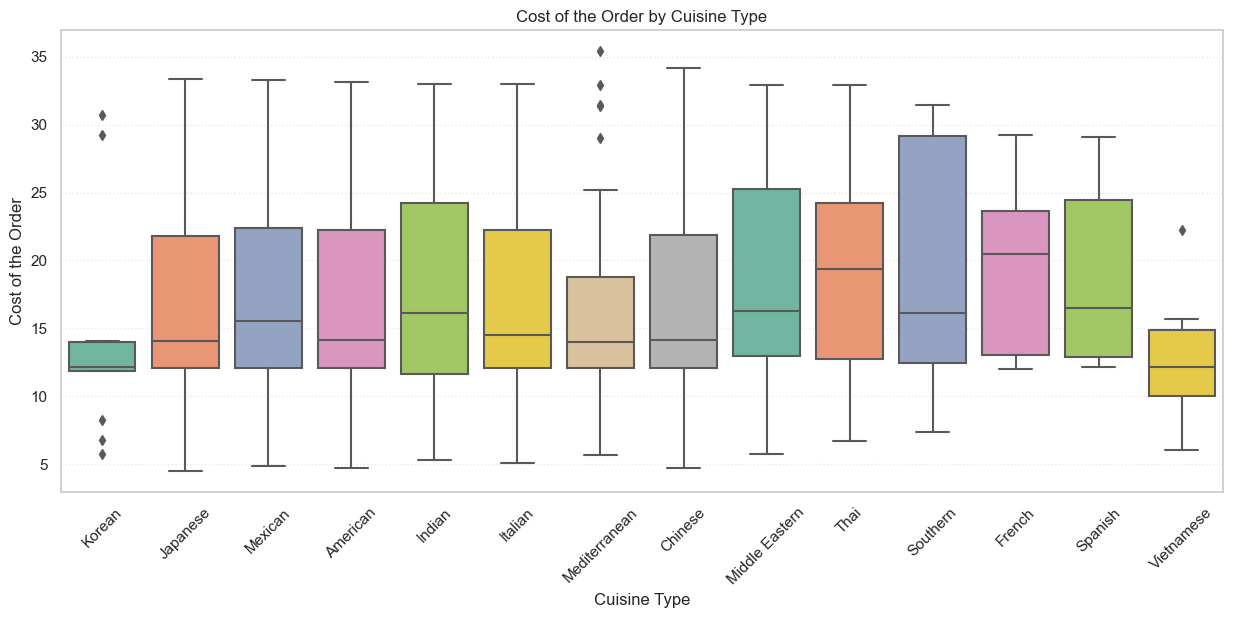

In [117]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='Set2')
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

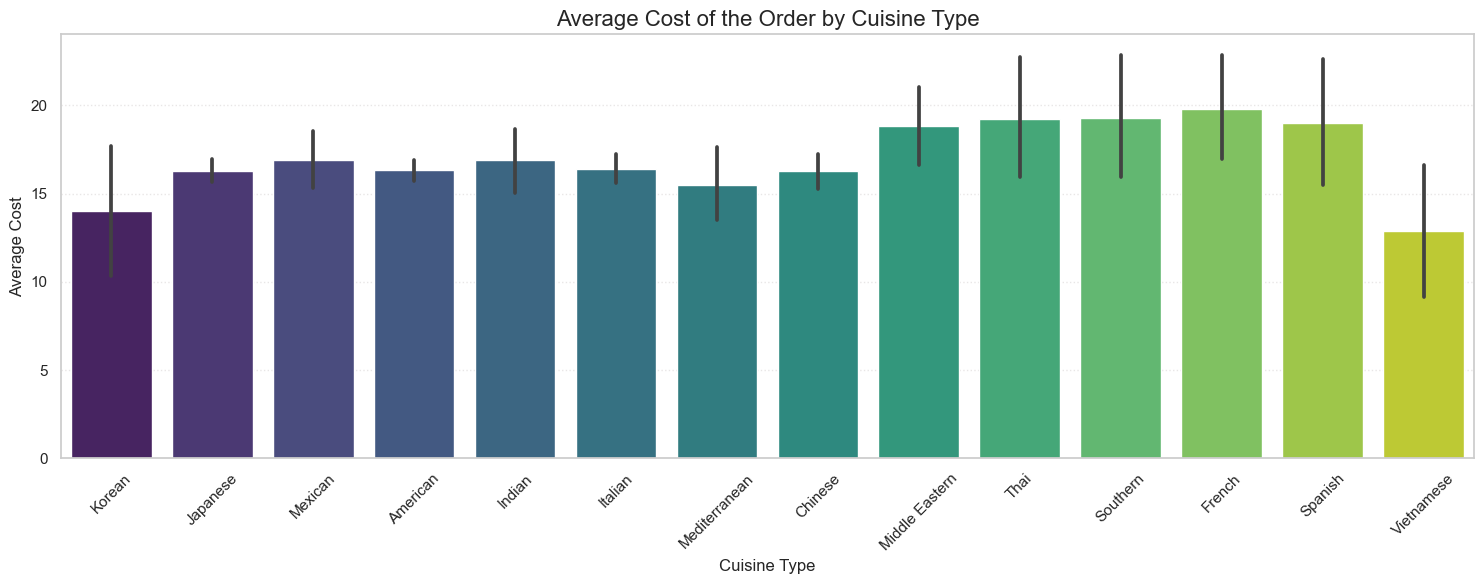

In [118]:
# create bar plot
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='viridis')

# title and labels
plt.title('Average Cost of the Order by Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.tight_layout()
plt.show()

In [119]:
avg_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()
avg_cost_by_cuisine

cuisine_type  cost_of_the_order
0         American          16.319829
1          Chinese          16.305209
2           French          19.793889
3           Indian          16.919726
4          Italian          16.418691
5         Japanese          16.304532
6           Korean          14.001538
7    Mediterranean          15.474783
8          Mexican          16.933117
9   Middle Eastern          18.820612
10        Southern          19.300588
11         Spanish          18.994167
12            Thai          19.207895
13      Vietnamese          12.882857

Observations:
1. The average cost of orders varies across different cuisine types.
2. French cuisine has the highest average cost at approximately 19.79 units, followed by Spanish and Southern cuisines.
3. Vietnamese cuisine has the lowest average cost at approximately 12.88 units.
4. Most cuisines have an average cost between 14 and 19 units.
5. The variation in average costs suggests that certain cuisines may be priced higher due to factors such as ingredient costs, preparation complexity, or restaurant pricing strategies.

**6 Restaurant Name and Cuisine Type**

In [120]:
x = 'restaurant_name'
y = 'cuisine_type'

df[x].nunique(), df[y].nunique()

(178, 14)

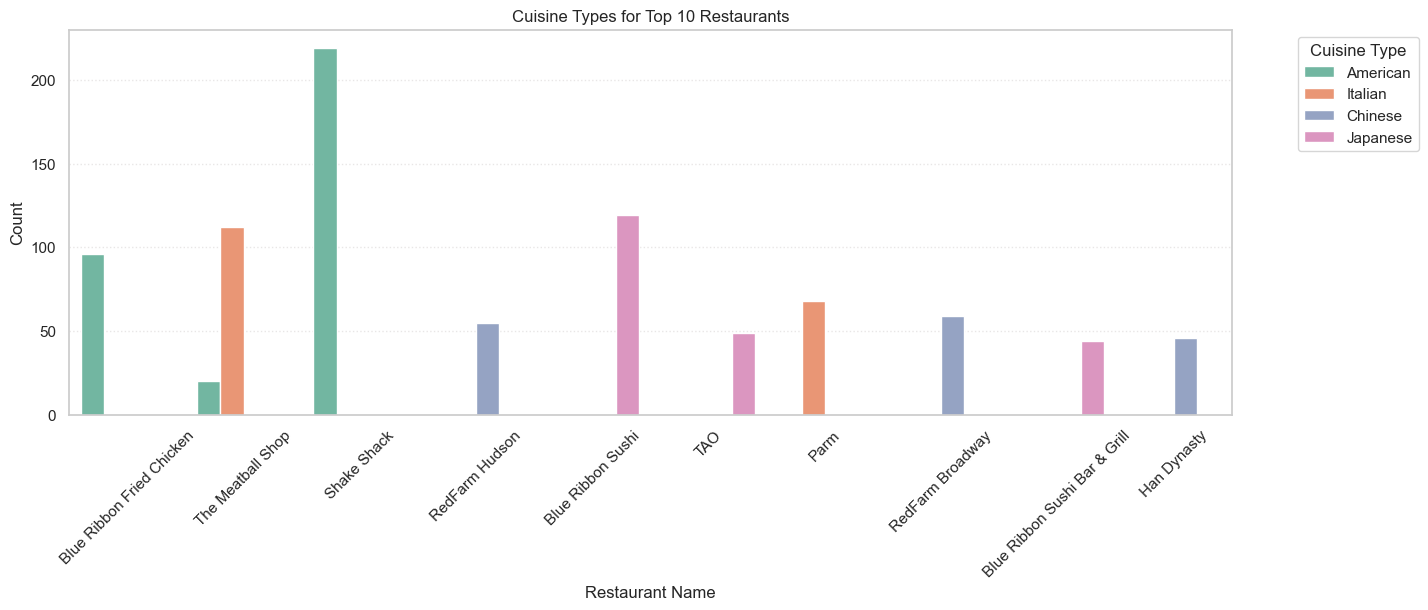

In [121]:
# Filter for top 10 restaurants by order count
top_restaurants_orderscount = df['restaurant_name'].value_counts().head(10).index
# rename below to top_restaurants_df
filtered_df = df[df['restaurant_name'].isin(top_restaurants_orderscount)]

plt.figure(figsize=(15, 5))
sns.countplot(data=filtered_df, x='restaurant_name', hue='cuisine_type', palette='Set2')
plt.title('Cuisine Types for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [122]:
restaurant_cuisine_count = filtered_df.groupby(['restaurant_name', 'cuisine_type']).size()
restaurant_cuisine_count

restaurant_name                cuisine_type
Blue Ribbon Fried Chicken      American         96
Blue Ribbon Sushi              Japanese        119
Blue Ribbon Sushi Bar & Grill  Japanese         44
Han Dynasty                    Chinese          46
Parm                           Italian          68
RedFarm Broadway               Chinese          59
RedFarm Hudson                 Chinese          55
Shake Shack                    American        219
TAO                            Japanese         49
The Meatball Shop              American         20
                               Italian         112
dtype: int64

In [123]:

# get order count for restaurant by cuisine type
restaurant_cuisine_count = filtered_df.groupby(['restaurant_name', 'cuisine_type']).size().unstack().fillna(0)
restaurant_cuisine_count

cuisine_type                   American  Chinese  Italian  Japanese
restaurant_name                                                    
Blue Ribbon Fried Chicken          96.0      0.0      0.0       0.0
Blue Ribbon Sushi                   0.0      0.0      0.0     119.0
Blue Ribbon Sushi Bar & Grill       0.0      0.0      0.0      44.0
Han Dynasty                         0.0     46.0      0.0       0.0
Parm                                0.0      0.0     68.0       0.0
RedFarm Broadway                    0.0     59.0      0.0       0.0
RedFarm Hudson                      0.0     55.0      0.0       0.0
Shake Shack                       219.0      0.0      0.0       0.0
TAO                                 0.0      0.0      0.0      49.0
The Meatball Shop                  20.0      0.0    112.0       0.0

In [124]:
# Descriptive Stats

# this is single line code equivalent to below code (5 steps)
#restaurant_cuisine_count = filtered_df.groupby(['restaurant_name', 'cuisine_type']).size().unstack().fillna(0)

# 1. Get the top 10 restaurants by order count
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index

# 2. Filter the DataFrame for these top 10 restaurants
filtered_df = df[df['restaurant_name'].isin(top_10_restaurants)]

# 3. Group by Restaurant and Cuisine, and count the orders
cuisine_order_count = filtered_df.groupby(['restaurant_name', 'cuisine_type']).size().reset_index(name='order_count')

# 4. Pivot for easier analysis or visualization
pivot_table = cuisine_order_count.pivot(index='restaurant_name', columns='cuisine_type', values='order_count').fillna(0)

# 5. Display the pivot table
print(pivot_table)


cuisine_type                   American  Chinese  Italian  Japanese
restaurant_name                                                    
Blue Ribbon Fried Chicken          96.0      0.0      0.0       0.0
Blue Ribbon Sushi                   0.0      0.0      0.0     119.0
Blue Ribbon Sushi Bar & Grill       0.0      0.0      0.0      44.0
Han Dynasty                         0.0     46.0      0.0       0.0
Parm                                0.0      0.0     68.0       0.0
RedFarm Broadway                    0.0     59.0      0.0       0.0
RedFarm Hudson                      0.0     55.0      0.0       0.0
Shake Shack                       219.0      0.0      0.0       0.0
TAO                                 0.0      0.0      0.0      49.0
The Meatball Shop                  20.0      0.0    112.0       0.0


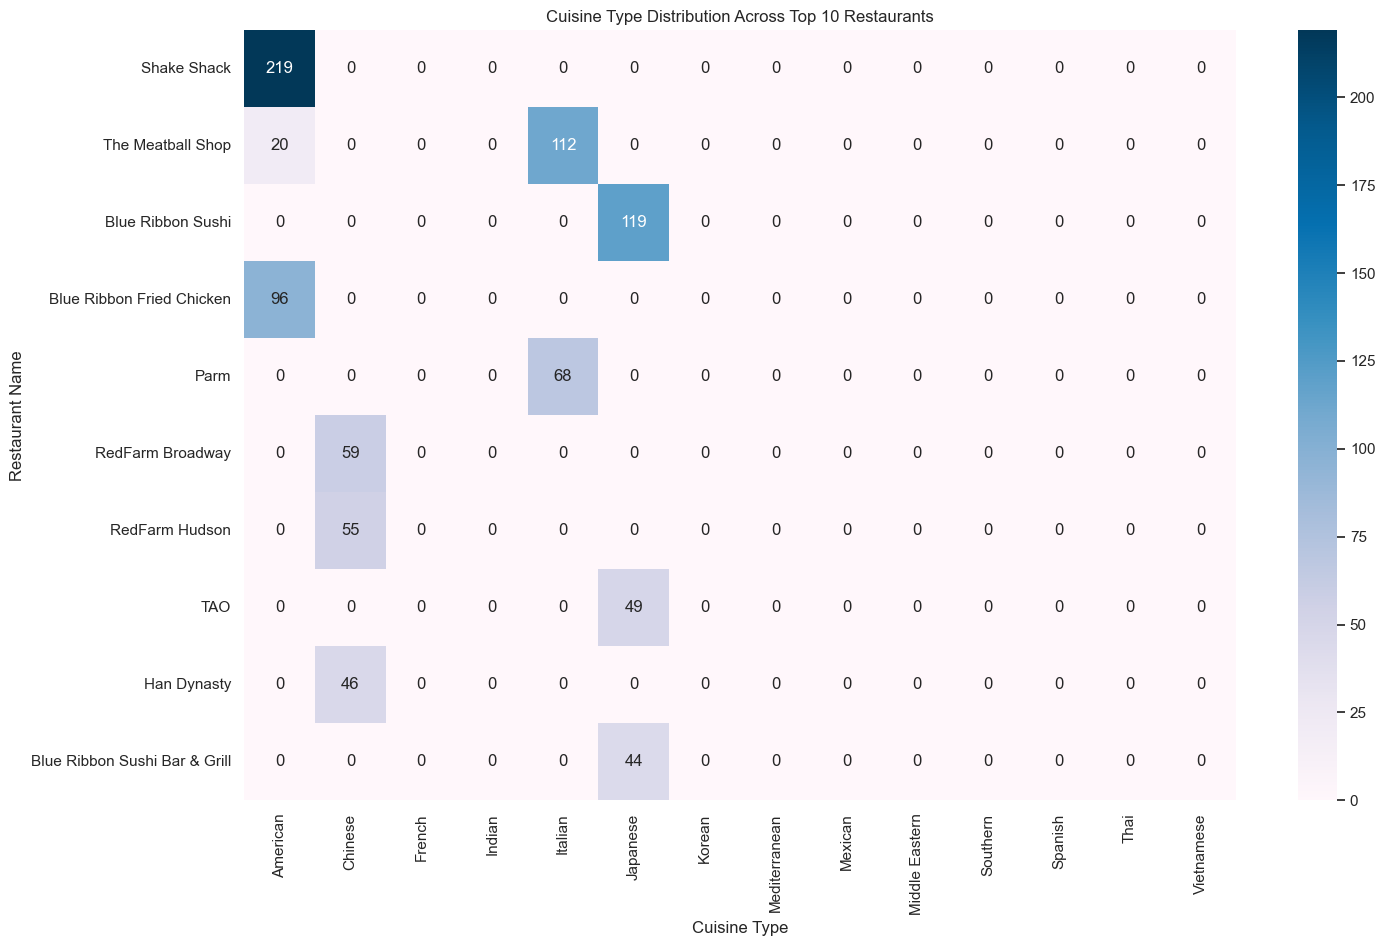

In [125]:
# Create a pivot table
pivot_table = df.pivot_table(index='restaurant_name', columns='cuisine_type', aggfunc='size', fill_value=0)

# Filter for top 10 restaurants
k = 10
top_restaurant_pivot = pivot_table.loc[pivot_table.sum(axis=1).nlargest(k).index]

plt.figure(figsize=(16, 10))
sns.heatmap(top_restaurant_pivot, annot=True, fmt='d', cmap='PuBu', cbar=True)
plt.title(f'Cuisine Type Distribution Across Top {k} Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Restaurant Name')
plt.show()

In [126]:
# Observations:
# 1. Shake Shack is exclusively known for American cuisine, with a total of 219 orders.
# 2. The Meatball Shop offers both American and Italian cuisines, with a higher preference for Italian cuisine (112 orders) compared to American (20 orders).
# 3. Blue Ribbon Sushi specializes in Japanese cuisine, with 119 orders.
# 4. Blue Ribbon Fried Chicken is known for American cuisine, with 96 orders.
# 5. Parm is exclusively known for Italian cuisine, with 68 orders.
# 6. RedFarm Broadway and RedFarm Hudson are known for Chinese cuisine, with 59 and 55 orders respectively.
# 7. TAO specializes in Japanese cuisine, with 49 orders.
# 8. Han Dynasty is known for Chinese cuisine, with 46 orders.
# 9. Blue Ribbon Sushi Bar & Grill specializes in Japanese cuisine, with 44 orders.

# These observations indicate that certain restaurants have a strong specialization in specific cuisines,
# and they tend to receive a high volume of orders for those cuisines.
# This could suggest a strong customer preference for these restaurants and their specialized cuisines.

# Also top restaurants dont have much variety in cuisine type, they are specialized in one or two cuisine types.

**7 Restaurant Name and Food Preparation Time**

Investigate the distribution of food preparation times across restaurants. 
1. Identify restaurants with consistently higher or lower preparation times.
2. If there are any outliers (ie exceptions) in preparation times for specific restaurants. 
3. Potential insights into operational & efficiency issues

> NOTE: We will focus on top-performing restaurants only for this analysis

In [141]:
x = 'restaurant_name'
y = 'food_preparation_time'
df[x].nunique(), df[y].nunique()

(178, 16)

In [145]:

print('top performing restaurants:\n')
top_restaurants_orderscount.to_list()

top performing restaurants:



['Shake Shack',
 'The Meatball Shop',
 'Blue Ribbon Sushi',
 'Blue Ribbon Fried Chicken',
 'Parm',
 'RedFarm Broadway',
 'RedFarm Hudson',
 'TAO',
 'Han Dynasty',
 'Blue Ribbon Sushi Bar & Grill']

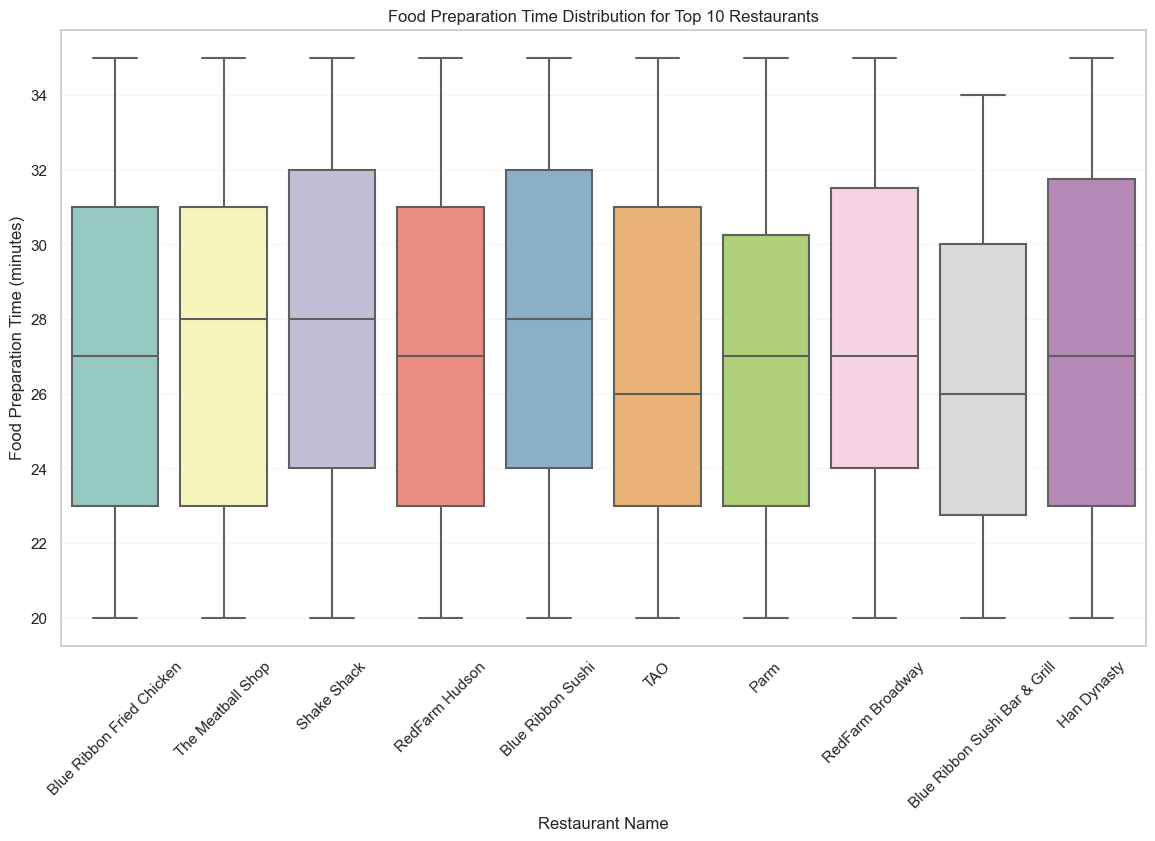

In [146]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='restaurant_name', y='food_preparation_time', palette='Set3')
plt.title('Food Preparation Time Distribution for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.show()

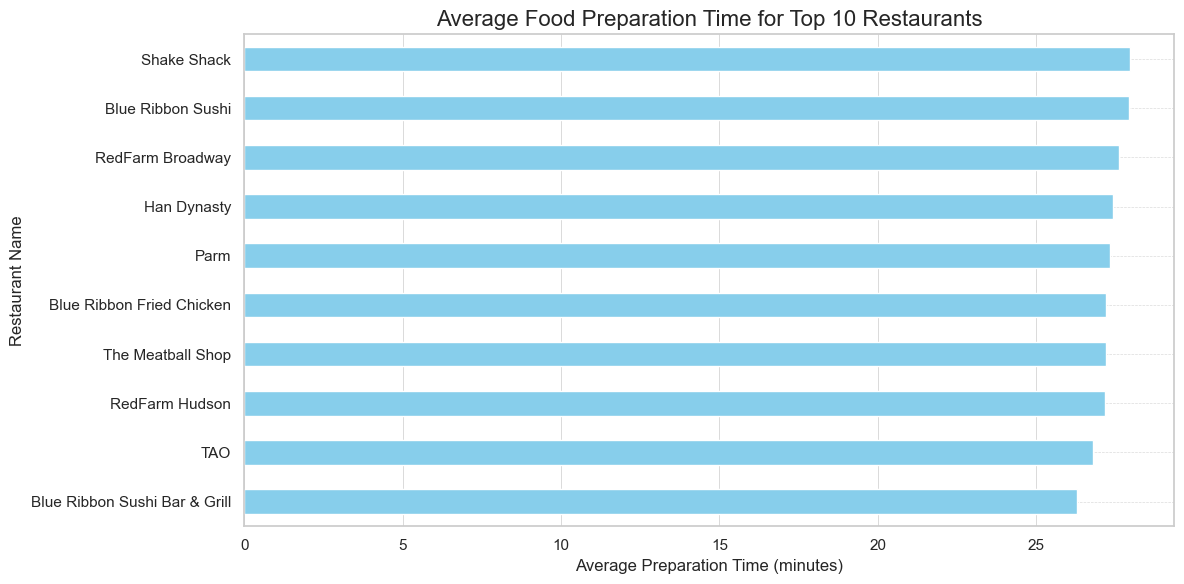

In [105]:
restaurant_avg_prep_time = filtered_df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values()

plt.figure(figsize=(12, 6))
restaurant_avg_prep_time.plot(kind='barh', color='skyblue')
plt.title('Average Food Preparation Time for Top 10 Restaurants', fontsize=16)
plt.xlabel('Average Preparation Time (minutes)', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

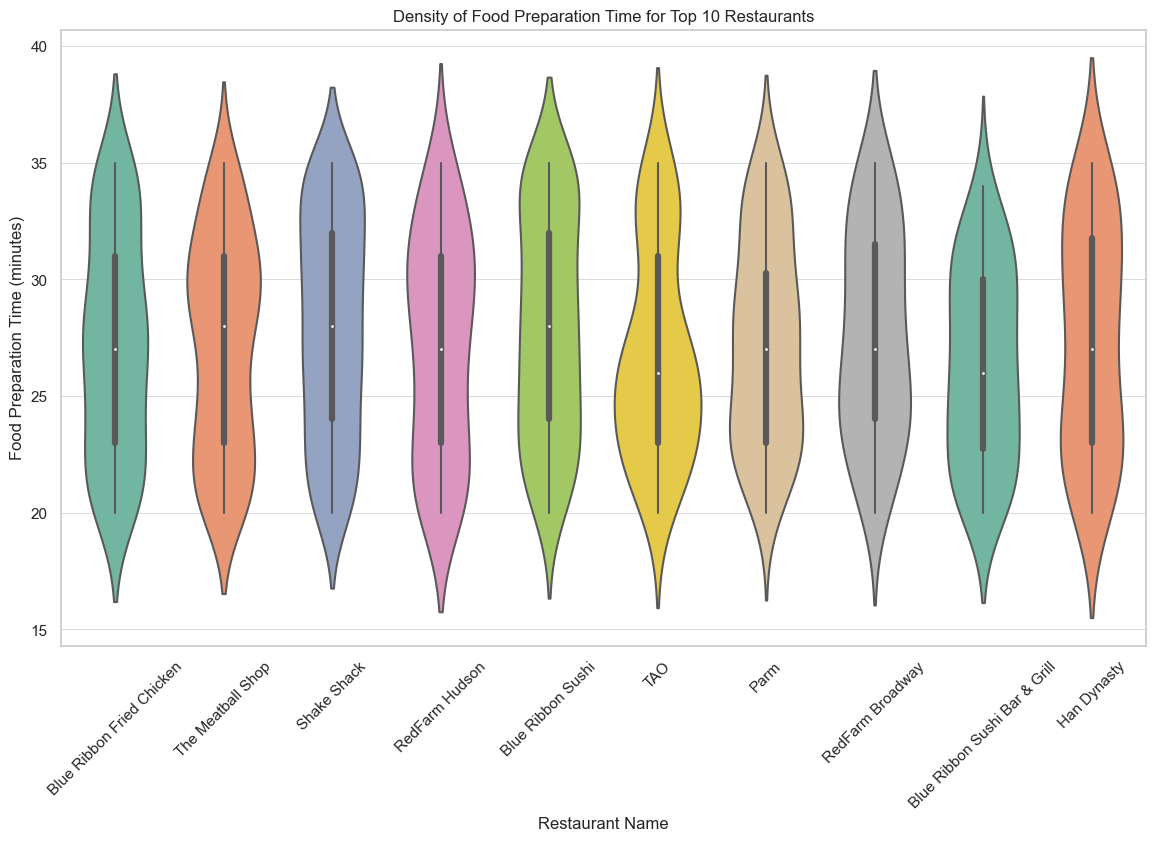

In [ ]:
# DONT TAKE THIS INTO ANS-Notebook (For Learning purpose only)

plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='restaurant_name', y='food_preparation_time', palette='Set2', inner="box")
plt.title('Density of Food Preparation Time for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [89]:
restaurant_avg_prep_time

restaurant_name
Blue Ribbon Sushi Bar & Grill    26.295455
TAO                              26.775510
RedFarm Hudson                   27.163636
The Meatball Shop                27.181818
Blue Ribbon Fried Chicken        27.197917
Parm                             27.308824
Han Dynasty                      27.413043
RedFarm Broadway                 27.593220
Blue Ribbon Sushi                27.924370
Shake Shack                      27.945205
Name: food_preparation_time, dtype: float64

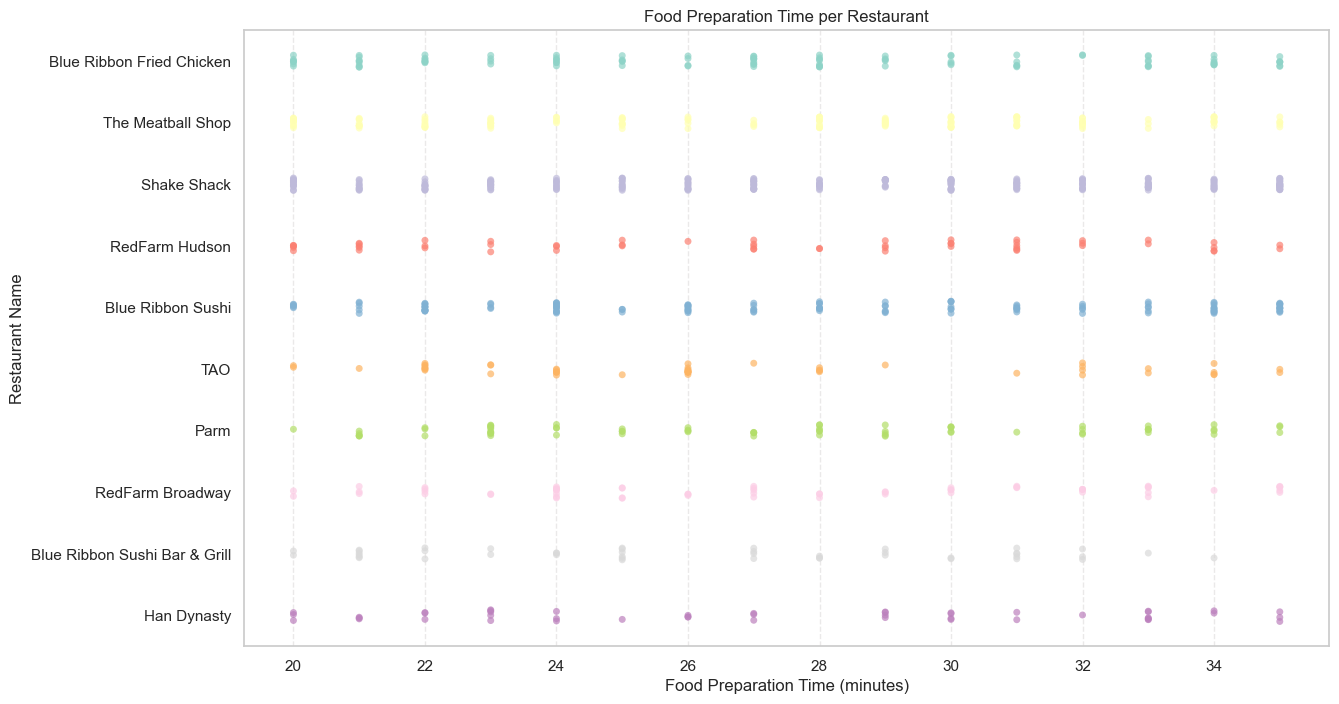

In [159]:
# TODO: Dont include Stip Plot but include Point Plot

# lets plot the strip plot for food preparation time by restaurant name
# Plot the strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(data=filtered_df,
              x='food_preparation_time',
              y='restaurant_name',
              palette='Set3',
              jitter=True,
              alpha=0.7,
              )
plt.title('Food Preparation Time per Restaurant')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

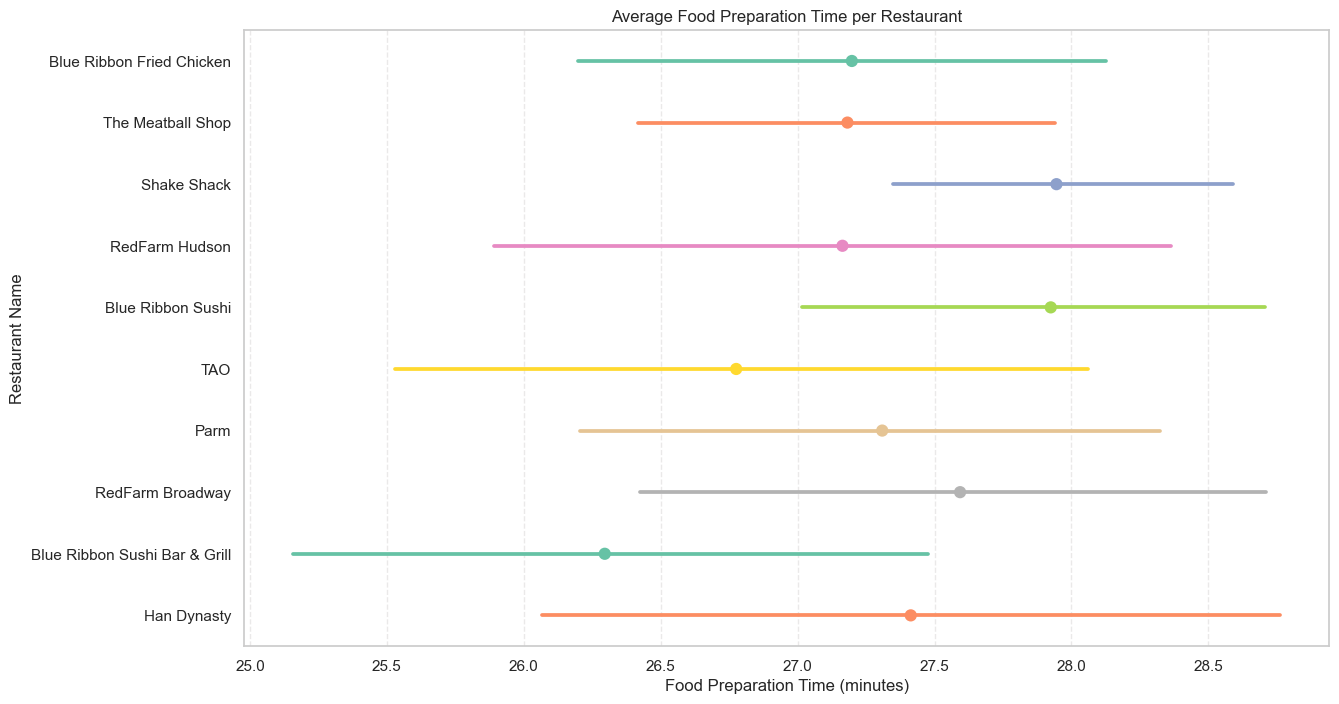

In [160]:
plt.figure(figsize=(14, 8))
sns.pointplot(data=filtered_df,
              x='food_preparation_time',
              y='restaurant_name',
              palette='Set2',
              join=False,
              markers='o',
              linestyles='--')
plt.title('Average Food Preparation Time per Restaurant')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [77]:
# todo: put this block near boxplt (ie before it)
# get food preparation time for top 10 restaurants
restaurant_food_preparation_time = filtered_df.groupby('restaurant_name')['food_preparation_time'].describe()
restaurant_food_preparation_time

count       mean       std   min    25%   50%  \
restaurant_name                                                                
Blue Ribbon Fried Chicken       96.0  27.197917  4.740908  20.0  23.00  27.0   
Blue Ribbon Sushi              119.0  27.924370  4.758863  20.0  24.00  28.0   
Blue Ribbon Sushi Bar & Grill   44.0  26.295455  4.100933  20.0  22.75  26.0   
Han Dynasty                     46.0  27.413043  4.833108  20.0  23.00  27.0   
Parm                            68.0  27.308824  4.351213  20.0  23.00  27.0   
RedFarm Broadway                59.0  27.593220  4.464877  20.0  24.00  27.0   
RedFarm Hudson                  55.0  27.163636  4.728807  20.0  23.00  27.0   
Shake Shack                    219.0  27.945205  4.744549  20.0  24.00  28.0   
TAO                             49.0  26.775510  4.431259  20.0  23.00  26.0   
The Meatball Shop              132.0  27.181818  4.596411  20.0  23.00  28.0   

                                 75%   max  
restaurant_name                             
Blue Ribbon Fried Chicken      31.00  35.0  
Blue Ribbon Sushi              32.00  35.0  
Blue Ribbon Sushi Bar & Grill  30.00  34.0  
Han Dynasty                    31.75  35.0  
Parm                           30.25  35.0  
RedFarm Broadway               31.50  35.0  
RedFarm Hudson                 31.00  35.0  
Shake Shack                    32.00  35.0  
TAO                            31.00  35.0  
The Meatball Shop              31.00  35.0

In [162]:
restaurant_avg_prep_time

restaurant_name
Blue Ribbon Sushi Bar & Grill    26.295455
TAO                              26.775510
RedFarm Hudson                   27.163636
The Meatball Shop                27.181818
Blue Ribbon Fried Chicken        27.197917
Parm                             27.308824
Han Dynasty                      27.413043
RedFarm Broadway                 27.593220
Blue Ribbon Sushi                27.924370
Shake Shack                      27.945205
Name: food_preparation_time, dtype: float64

# Observations for Average Food Preparation Time for Top 10 Restaurants

1. **Shake Shack** has the highest average food preparation time of approximately 27.95 minutes.
2. **Blue Ribbon Sushi Bar & Grill** has the lowest average food preparation time of approximately 26.30 minutes.
3. The average food preparation times for the top 10 restaurants are fairly consistent, ranging from 26.30 to 27.95 minutes.
4. The standard deviation for food preparation times is relatively low, indicating that the preparation times are consistent within each restaurant.
5. The interquartile range (IQR) for most restaurants is narrow, suggesting that the majority of orders are prepared within a similar time frame.
6. The maximum food preparation time for all top 10 restaurants is 35 minutes, while the minimum is 20 minutes.
7. **Shake Shack** and **Blue Ribbon Sushi** have the highest variability in preparation times, as indicated by their standard deviations.
8. **TAO** and **Blue Ribbon Sushi Bar & Grill** have the lowest average preparation times, indicating potentially more efficient kitchen operations.

These observations suggest that while there is some variability in food preparation times among the top 10 restaurants, the differences are not substantial. Most restaurants have a standardized process that ensures consistent preparation times, which can lead to predictable and reliable service for customers.

**Observations**:

1. **Consistency** The top-performing restaurants typically prepare food within 30 minutes in most cases.
   **Shake Shack** has the highest average food preparation time of approximately 27.95 minutes.
   **TAO** and **Blue Ribbon Sushi Bar & Grill** have the lowest average preparation times, indicating potentially more efficient kitchen operations.

2. **Reliability** The interquartile range (IQR) for most restaurants is between 23 and 31 minutes. This means that 50% of the orders are prepared within this time frame, providing a reliable estimate for customers on how long their orders will take.

3. **Outliers**: There are some exceptions in preparation times. For instance, Shake Shack and Blue Ribbon Sushi have maximum preparation times of 35 minutes, which could be due to larger or more complex orders.

4. **Operational Efficiency**: The relatively narrow range of preparation times suggests that these top-performing restaurants have efficient kitchen operations and are able to manage their order volumes effectively.

Overall, the data indicates that the top 10 restaurants maintain a high level of consistency in their food preparation times, with some variability due to order complexity or volume.
These observations suggest that while there is some variability in food preparation times among the top 10 restaurants, the differences are not substantial. Most restaurants have a standardized process that ensures consistent preparation times, which can lead to predictable and reliable service for customers.

**8 Cuisine Type & Food Preparation Time**

- Investigate how food preparation times vary across different cuisine types. Identify if certain cuisines take longer or shorter for preparation.
- Potential insights into restaurant operations based on cuisine-specific demands

In [163]:
x = 'cuisine_type'
y = 'food_preparation_time'
df[x].nunique(), df[y].nunique()

(14, 16)

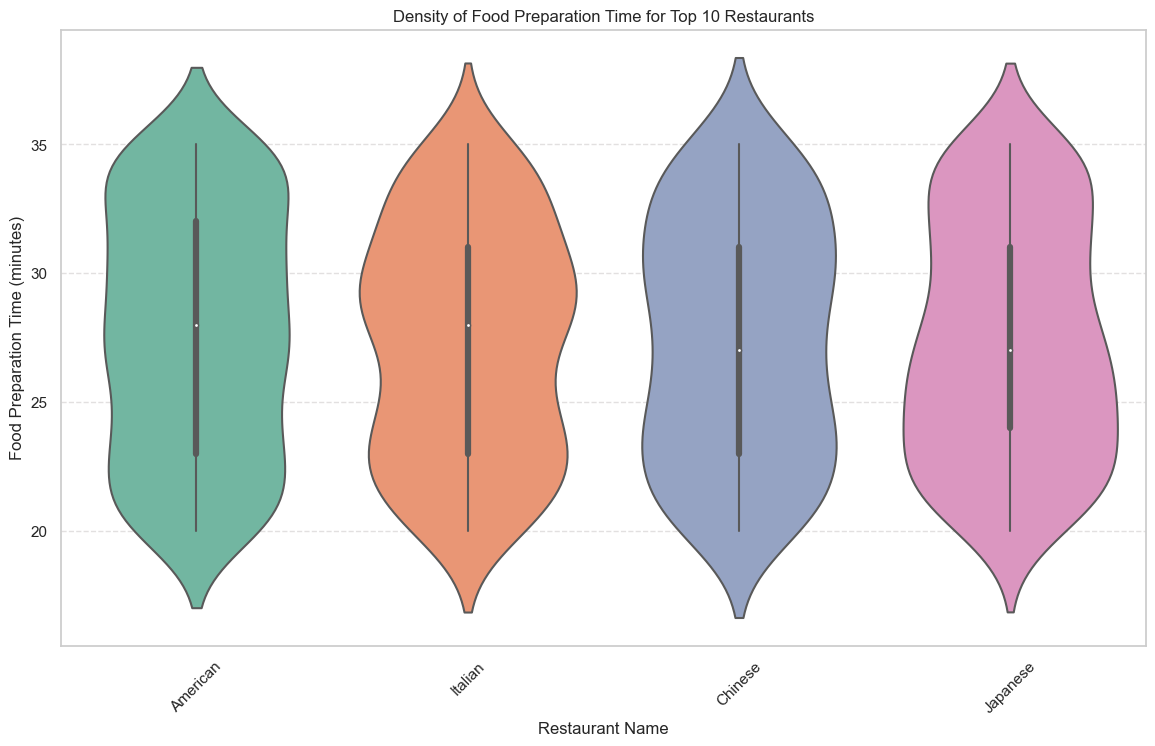

In [164]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='cuisine_type', y='food_preparation_time', palette='Set2', inner="box")
plt.title('Density & Distibution of Food Preparation Time for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.show()

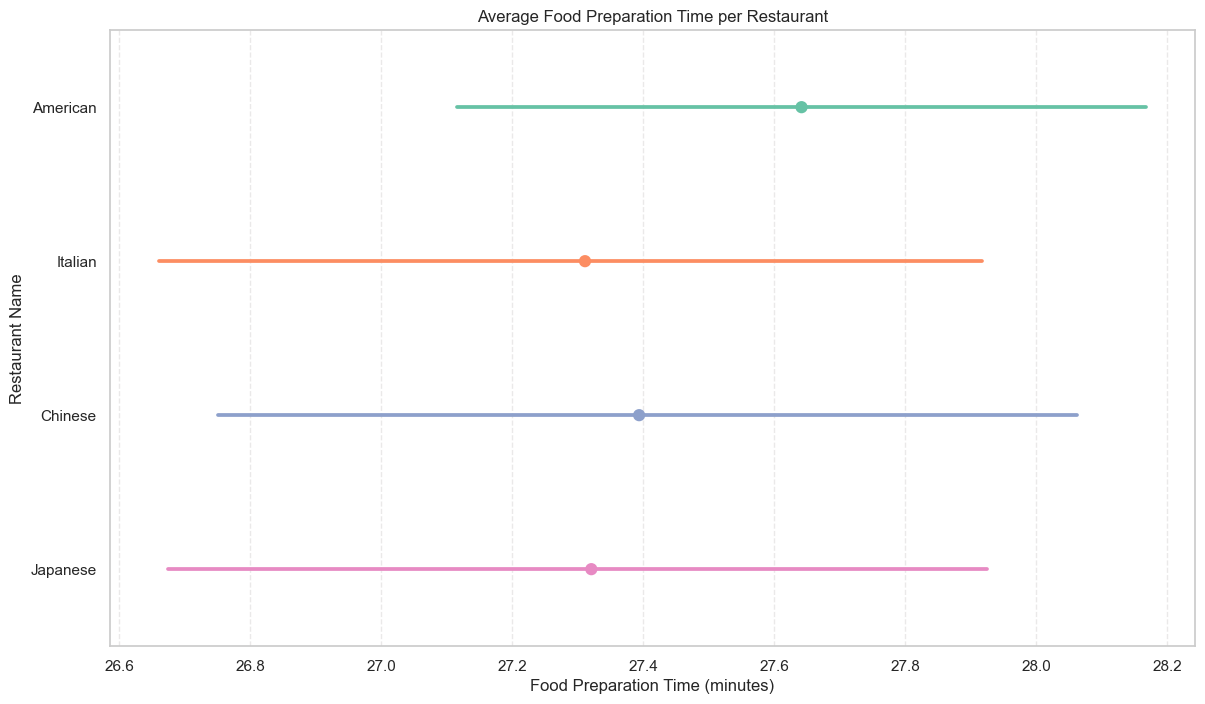

In [175]:
plt.figure(figsize=(14, 8))
sns.pointplot(data=filtered_df,
              x=y,
              y=x,
              palette='Set2',
              join=False,
              markers='o',
              linestyles='--')
plt.title('Average Food Preparation Time per Restaurant')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

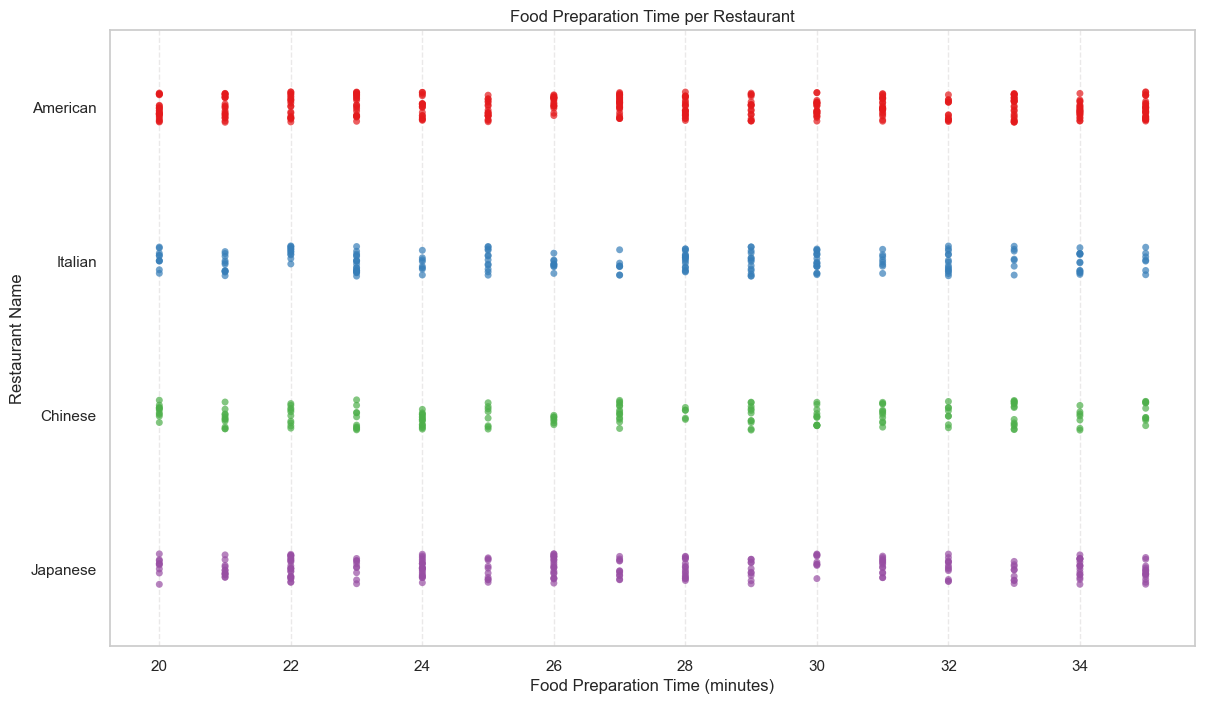

In [167]:
# lets plot the strip plot for food preparation time by restaurant name
# Plot the strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(data=filtered_df,
              x=y,
              y=x,
              palette='Set1',
              jitter=True,
              alpha=0.7,
              )
plt.title('Food Preparation Time per Restaurant')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Get Descriptive Stats about food preparation time for each cuisine type
cuisine_mid_prep_time_stats = filtered_df.groupby('cuisine_type')['food_preparation_time'].describe()
cuisine_mid_prep_time_stats

count       mean       std   min   25%   50%   75%   max
cuisine_type                                                          
American      335.0  27.641791  4.767346  20.0  23.0  28.0  32.0  35.0
Chinese       160.0  27.393750  4.637958  20.0  23.0  27.0  31.0  35.0
Italian       180.0  27.311111  4.448701  20.0  23.0  28.0  31.0  35.0
Japanese      212.0  27.320755  4.588358  20.0  24.0  27.0  31.0  35.0

In [178]:
restaurant_avg_prep_time = filtered_df.groupby('cuisine_type')['food_preparation_time'].median().sort_values()
restaurant_avg_prep_time

cuisine_type
Chinese     27.0
Japanese    27.0
American    28.0
Italian     28.0
Name: food_preparation_time, dtype: float64

**Observations for Cuisine Mid Preparation Time Statistics:**

**Summary:**
- The average preparation times for American, Chinese, Italian, and Japanese cuisines are quite similar.
- The standard deviations are also similar, indicating consistent preparation times within each cuisine type.
- The minimum and maximum preparation times are the same across all cuisines, suggesting a standardized range for food preparation.
- The interquartile ranges (IQR) are narrow, indicating that most orders are prepared within a similar time frame for each cuisine.
- The median preparation times are close to the average times, further indicating consistency in preparation times.

These observations suggest that the preparation times for different cuisines are fairly consistent, with only slight variations. This consistency can lead to predictable and reliable service for customers, regardless of the cuisine type.

**9 Cost of Order & Preparation Time**

Explore if there’s a relationship between the cost of an order and the time taken to prepare the food. 
For example, do higher-cost orders generally require more preparation time?

In [180]:
list(df.columns)

['order_id',
 'customer_id',
 'restaurant_name',
 'cuisine_type',
 'cost_of_the_order',
 'day_of_the_week',
 'rating',
 'food_preparation_time',
 'delivery_time']

In [188]:
x = 'cost_of_the_order'
y = 'food_preparation_time'


In [193]:
# Clean the data
df[x].dtype

dtype('float64')

In [195]:
df[x].corr(df[y])

0.04152747282774475

In [196]:
df[[x, y]].corr()

cost_of_the_order  food_preparation_time
cost_of_the_order               1.000000               0.041527
food_preparation_time           0.041527               1.000000

At high level, it seems that the preparation time for food items does not strongly influence their cost. i.e High-cost items do not necessarily take longer to prepare, nor do low-cost items tend to be quicker.
Hence maybe cuisine type & restaurant policies, might play a more significant role in determinign cost.

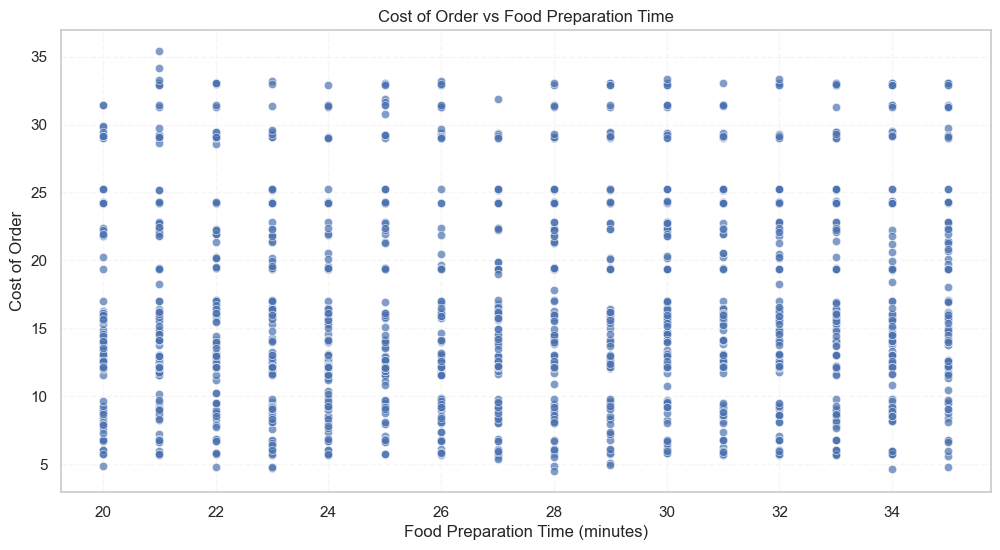

In [207]:
# DONT Include (Just for learning)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,
                x='food_preparation_time',
                y='cost_of_the_order',
                palette='viridis',
                alpha=0.7)
plt.title('Cost of Order vs Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost of Order')
plt.grid(alpha=0.3)
#plt.show()

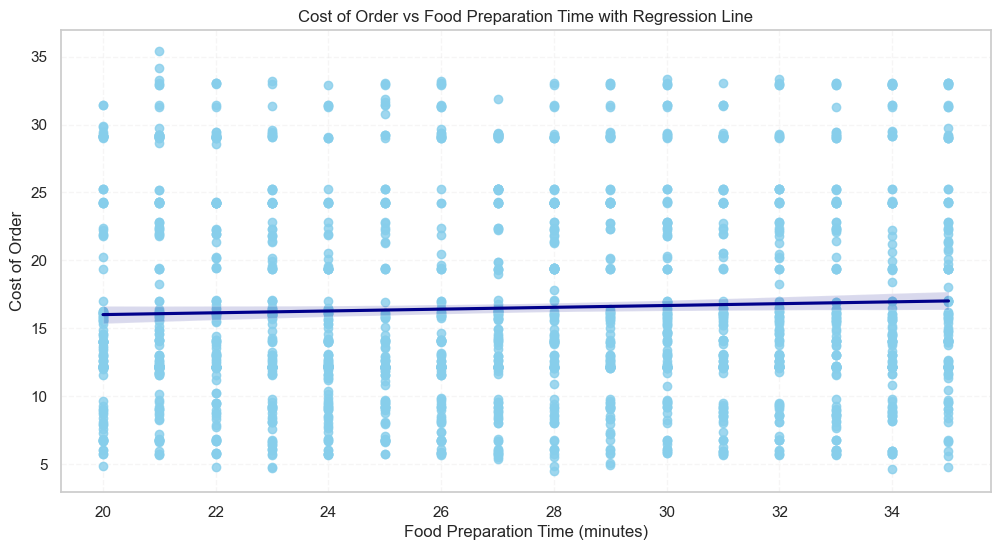

In [ ]:
# DONT include (Just for learning)
plt.figure(figsize=(12, 6))
sns.regplot(data=df,
            x='food_preparation_time',
            y='cost_of_the_order',
            scatter_kws={'alpha': 0.8},  # Transparency for better visibility
            line_kws={'color': 'darkblue'},  # Regression line in red
            color='skyblue')
plt.title('Cost of Order vs Food Preparation Time with Regression Line')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost of Order')
plt.grid(alpha=0.3)
plt.show()

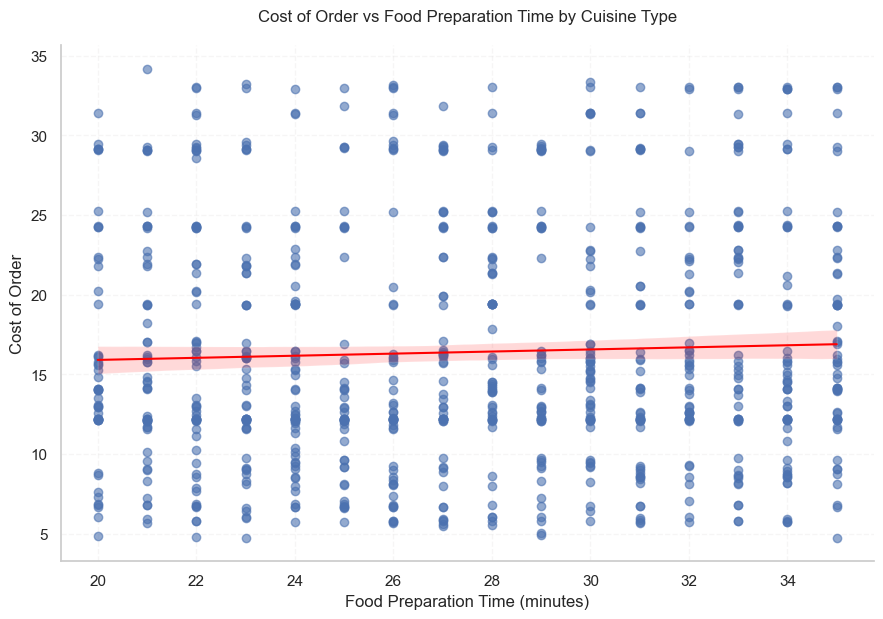

In [213]:
sns.lmplot(data=filtered_df,
           x='food_preparation_time',
           y='cost_of_the_order',
           height=6, aspect=1.5,
           scatter_kws={'alpha': 0.6},  # Transparency for scatter points
           line_kws={'linewidth': 1.5, 'color': 'red'})  # Thicker regression lines
plt.title('Cost of Order vs Food Preparation Time by Cuisine Type', y=1.03)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost of Order')
plt.grid(alpha=0.3)
plt.show()

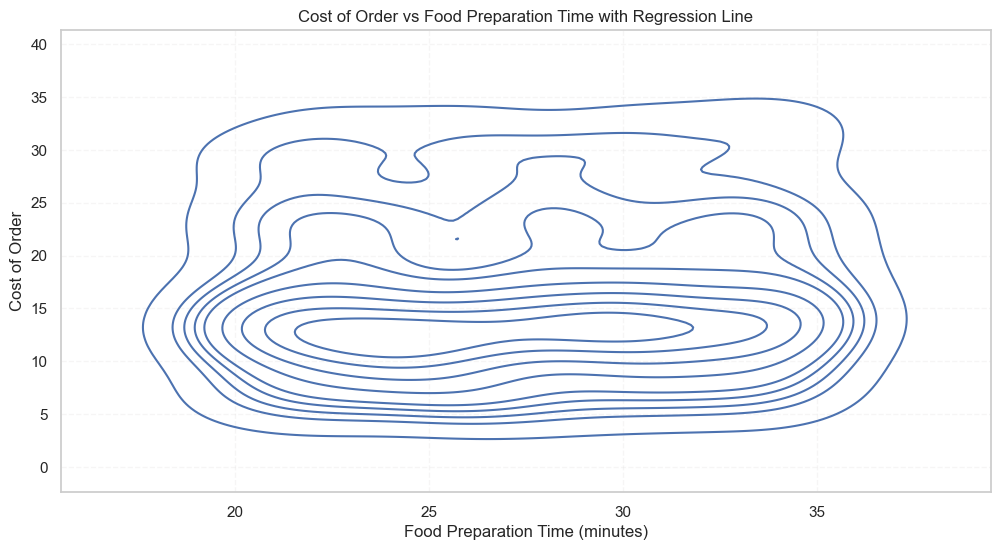

In [208]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=filtered_df,
            x='food_preparation_time',
            y='cost_of_the_order')
plt.title('Cost of Order vs Food Preparation Time with Regression Line')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost of Order')
plt.grid(alpha=0.3)
plt.show()

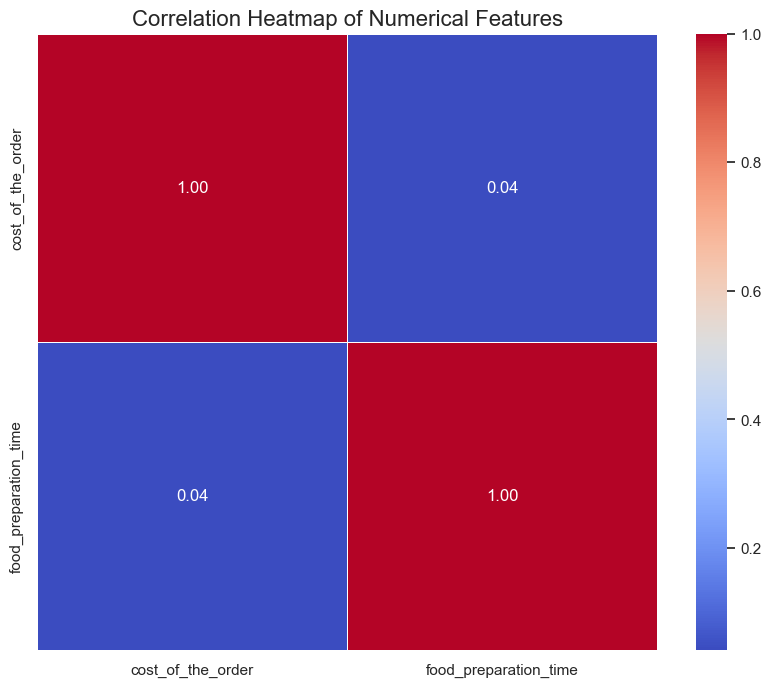

In [214]:
# DONT Include (Just for learning)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[[x, y]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [215]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

**10 Cuisine Type, Cost Of Order, Day Of Week**

This can reveal demand & patterns for specific cuisines on different days. 

In [217]:
x = 'cuisine_type'
y = 'cost_of_the_order'
z = 'day_of_the_week'

In [219]:
cost_of_cuisine_by_day = df.groupby([x, z])[y].mean()
cost_of_cuisine_by_day

cuisine_type    day_of_the_week
American        Weekday            15.308343
                Weekend            16.731735
Chinese         Weekday            17.147692
                Weekend            16.036442
French          Weekday            20.866000
                Weekend            19.381538
Indian          Weekday            17.162500
                Weekend            16.800816
Italian         Weekday            16.890110
                Weekend            16.211449
Japanese        Weekday            16.368074
                Weekend            16.278925
Korean          Weekday            12.180000
                Weekend            14.332727
Mediterranean   Weekday            14.040000
                Weekend            16.102500
Mexican         Weekday            16.555833
                Weekend            17.103962
Middle Eastern  Weekday            19.832941
                Weekend            18.282812
Southern        Weekday            19.226667
                Weekend

In [220]:
# convert to table form by unstack
# NOTE: second level (ie day_of_the_week) will become column
cost_of_cuisine_by_day_tbl = cost_of_cuisine_by_day.unstack()
cost_of_cuisine_by_day_tbl

day_of_the_week    Weekday    Weekend
cuisine_type                         
American         15.308343  16.731735
Chinese          17.147692  16.036442
French           20.866000  19.381538
Indian           17.162500  16.800816
Italian          16.890110  16.211449
Japanese         16.368074  16.278925
Korean           12.180000  14.332727
Mediterranean    14.040000  16.102500
Mexican          16.555833  17.103962
Middle Eastern   19.832941  18.282812
Southern         19.226667  19.340909
Spanish          12.130000  19.618182
Thai             15.462500  20.206667
Vietnamese       11.916667  13.607500

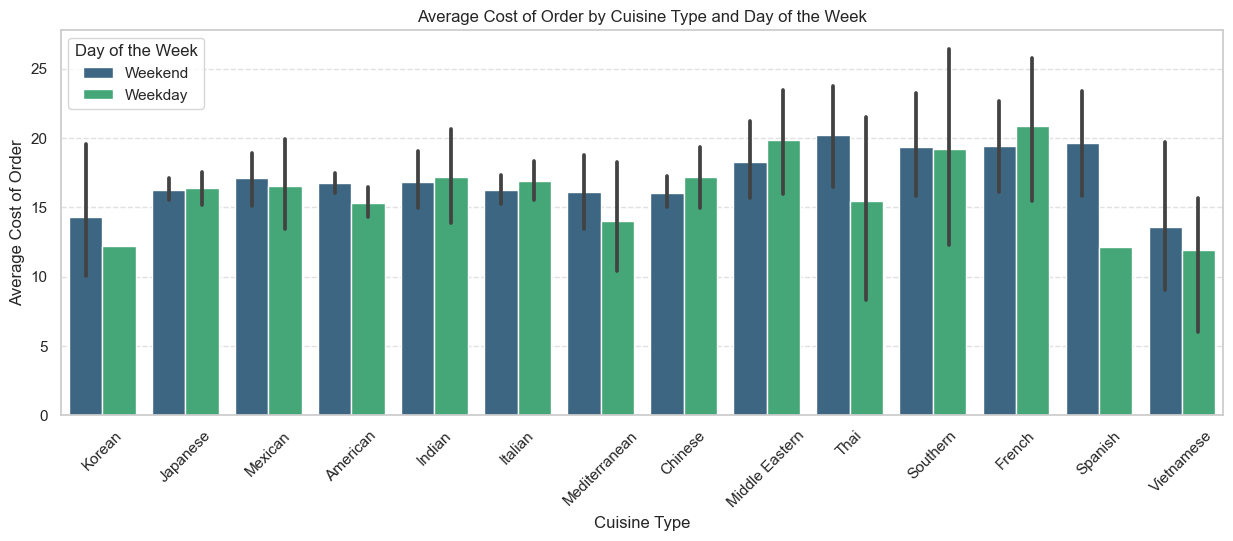

In [223]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x=x, y=y, hue=z, palette='viridis')
plt.title('Average Cost of Order by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper left')
#plt.tight_layout()
plt.show()

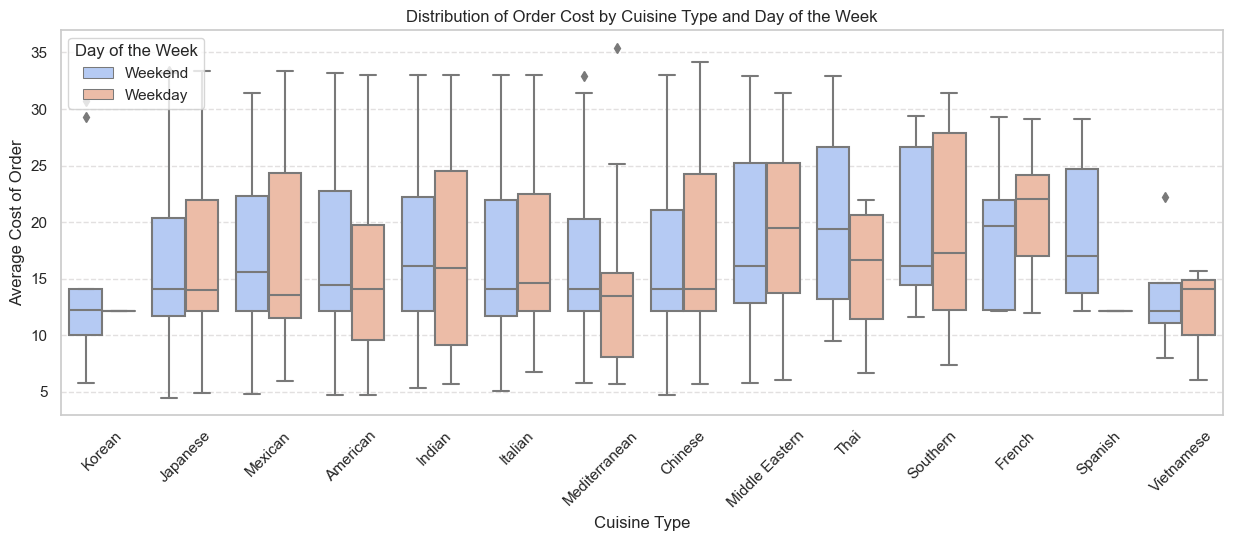

In [230]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x=x, y=y, hue=z, palette='coolwarm')
plt.title('Distribution of Order Cost by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper left')
#plt.tight_layout()
plt.show()

As it's hard to interpret so lets try facet grid

In [ ]:
# Set up the FacetGrid
g = sns.FacetGrid(df, col='cuisine_type', row='day_of_the_week', height=3, aspect=1.5)

# Plot a boxplot (you can switch to violinplot if preferred)
g.map(sns.boxplot, 'cuisine_type', 'cost_of_the_order', order=df['cuisine_type'])

# Adjust titles and labels
g.set_axis_labels("Cuisine Type", "Cost of Order")
g.set_titles("{col_name} - {row_name}")  # Title format for each facet

# Add title for the entire grid
plt.subplots_adjust(top=0.9)  # Make room for the title
g.fig.suptitle('Cost of Order by Cuisine Type and Day of the Week', fontsize=16)

# Show the plot
plt.show()


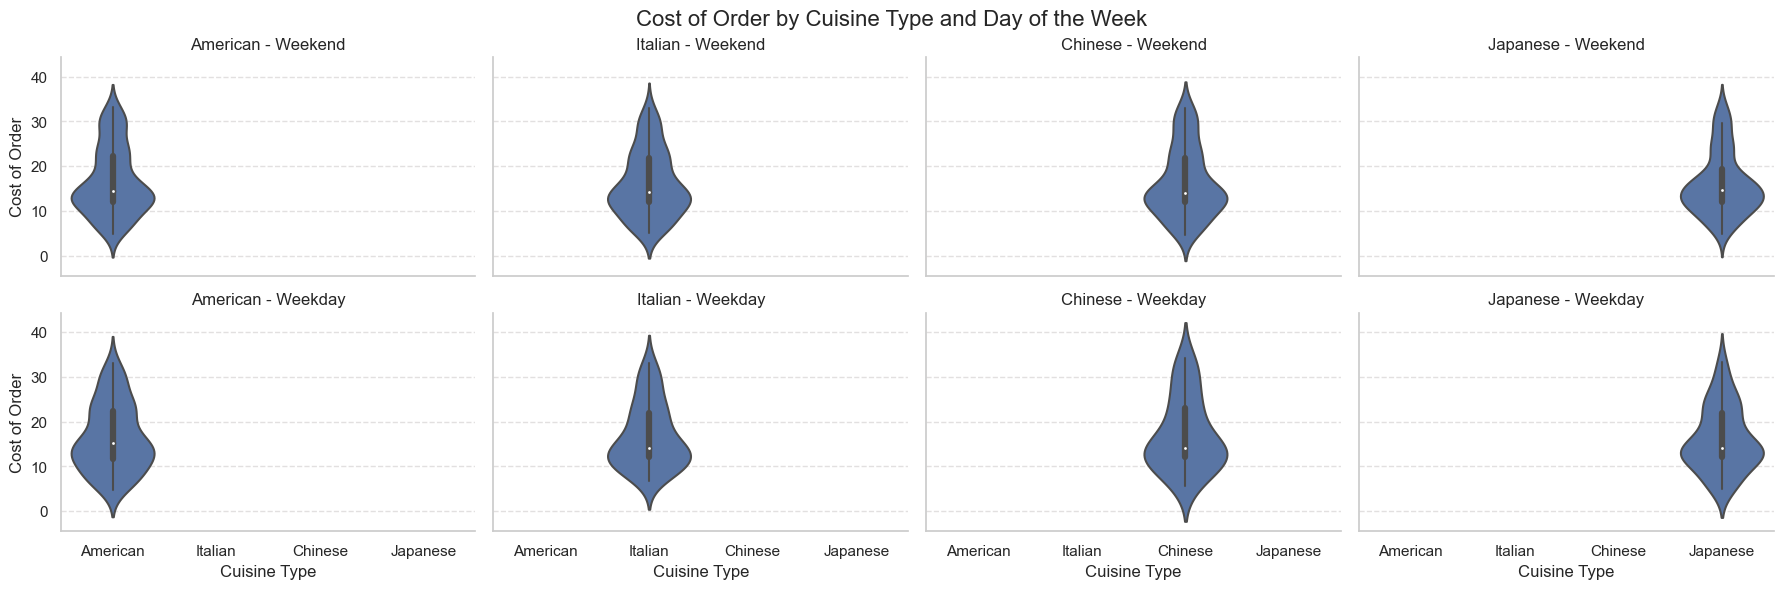

In [225]:
# Set up the FacetGrid
g = sns.FacetGrid(filtered_df, col='cuisine_type', row='day_of_the_week', height=3, aspect=1.5)

# Plot a violinplot (instead of boxplot)
g.map(sns.violinplot, 'cuisine_type', 'cost_of_the_order', order=filtered_df['cuisine_type'].unique())

# Adjust titles and labels
g.set_axis_labels("Cuisine Type", "Cost of Order")
g.set_titles("{col_name} - {row_name}")  # Title format for each facet

# Add title for the entire grid
plt.subplots_adjust(top=0.9)  # Make room for the title
g.fig.suptitle('Cost of Order by Cuisine Type and Day of the Week', fontsize=16)

# Show the plot
plt.show()


Even Confidence Interval added seems viable for most of the cuisines

**Observations for Average Cost of Order by Cuisine Type and Day of the Week:**

1. **American Cuisine**:
    - The average cost of orders is higher on weekends (16.73 units) compared to weekdays (15.31 units).
    - This suggests that customers may be willing to spend more on American cuisine during weekends.

2. **Chinese Cuisine**:
    - The average cost of orders is slightly higher on weekdays (17.15 units) compared to weekends (16.04 units).
    - This indicates a consistent demand for Chinese cuisine throughout the week, with a slight preference for higher spending on weekdays.

3. **French Cuisine**:
    - The average cost of orders is higher on weekdays (20.87 units) compared to weekends (19.38 units).
    - This suggests that French cuisine is generally more expensive, with customers spending more on weekdays.

4. **Indian Cuisine**:
    - The average cost of orders is slightly higher on weekdays (17.16 units) compared to weekends (16.80 units).
    - This indicates a consistent demand for Indian cuisine throughout the week.

5. **Italian Cuisine**:
    - The average cost of orders is higher on weekdays (16.89 units) compared to weekends (16.21 units).
    - This suggests that customers may spend more on Italian cuisine during weekdays.

6. **Japanese Cuisine**:
    - The average cost of orders is relatively consistent between weekdays (16.37 units) and weekends (16.28 units).
    - This indicates a stable demand for Japanese cuisine throughout the week.

7. **Korean Cuisine**:
    - The average cost of orders is higher on weekends (14.33 units) compared to weekdays (12.18 units).
    - This suggests that customers are willing to spend more on Korean cuisine during weekends.

8. **Mediterranean Cuisine**:
    - The average cost of orders is higher on weekends (16.10 units) compared to weekdays (14.04 units).
    - This indicates a higher spending on Mediterranean cuisine during weekends.

9. **Mexican Cuisine**:
    - The average cost of orders is slightly higher on weekends (17.10 units) compared to weekdays (16.56 units).
    - This suggests a consistent demand for Mexican cuisine with a slight increase in spending on weekends.

10. **Middle Eastern Cuisine**:
     - The average cost of orders is higher on weekdays (19.83 units) compared to weekends (18.28 units).
     - This indicates that Middle Eastern cuisine is generally more expensive, with higher spending on weekdays.

11. **Southern Cuisine**:
     - The average cost of orders is relatively consistent between weekdays (19.23 units) and weekends (19.34 units).
     - This suggests a stable demand for Southern cuisine throughout the week.

12. **Spanish Cuisine**:
     - The average cost of orders is significantly higher on weekends (19.62 units) compared to weekdays (12.13 units).
     - This indicates a strong preference for Spanish cuisine on weekends, with customers willing to spend more.

13. **Thai Cuisine**:
     - The average cost of orders is higher on weekends (20.21 units) compared to weekdays (15.46 units).
     - This suggests that customers are willing to spend more on Thai cuisine during weekends.

14. **Vietnamese Cuisine**:
     - The average cost of orders is higher on weekends (13.61 units) compared to weekdays (11.92 units).
     - This indicates a higher spending on Vietnamese cuisine during weekends.

**Overall Observations**:
- Most cuisines have higher average costs on weekends compared to weekdays, indicating that customers are generally willing to spend more on food orders during weekends.
- French, Middle Eastern, and Thai cuisines have the highest average costs, suggesting that these cuisines are generally more expensive.
- The variation in average costs across different cuisines and days of the week provides insights into customer spending behavior and preferences.

**11 Ratings, Cost of Order & Food Preparation Time**

Determine how preparation time and cost impact customer ratings. The goal is to explore correlations and trends, which can highlight key drivers of customer satisfaction.


In [82]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [87]:
x = 'cost_of_the_order'
y = 'preparation_time'
z = 'rating'

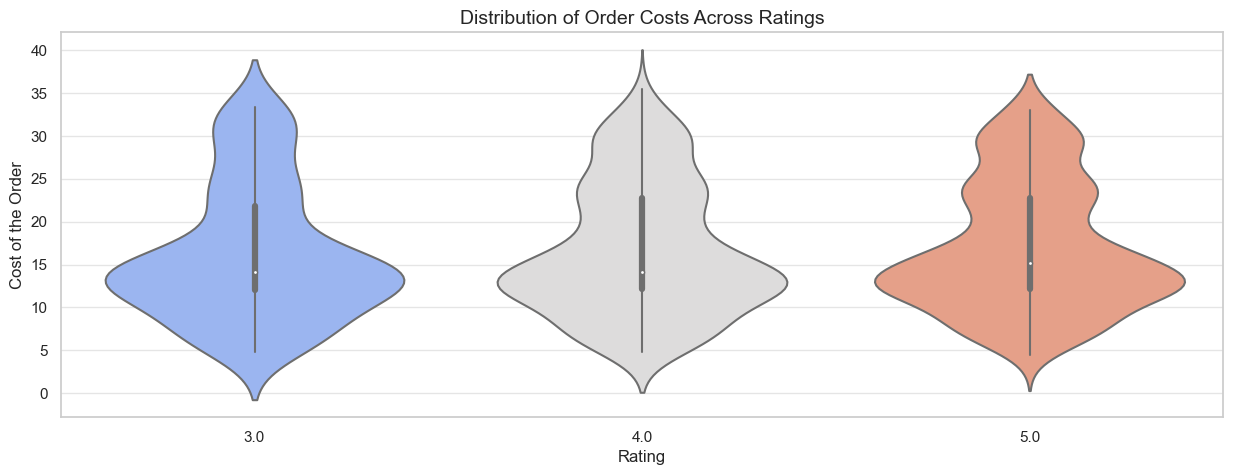

In [ ]:
# TODO: Dont include this in final ans notebook as this plot is aleady covered in previous section
# If not covered in previous section, then include this plot in this section

plt.figure(figsize=(15, 5))
sns.violinplot(
    data=df,
    x='rating',
    y='cost_of_the_order',
    palette='coolwarm'
)
plt.title('Distribution of Order Costs Across Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cost of the Order', fontsize=12)
plt.show()

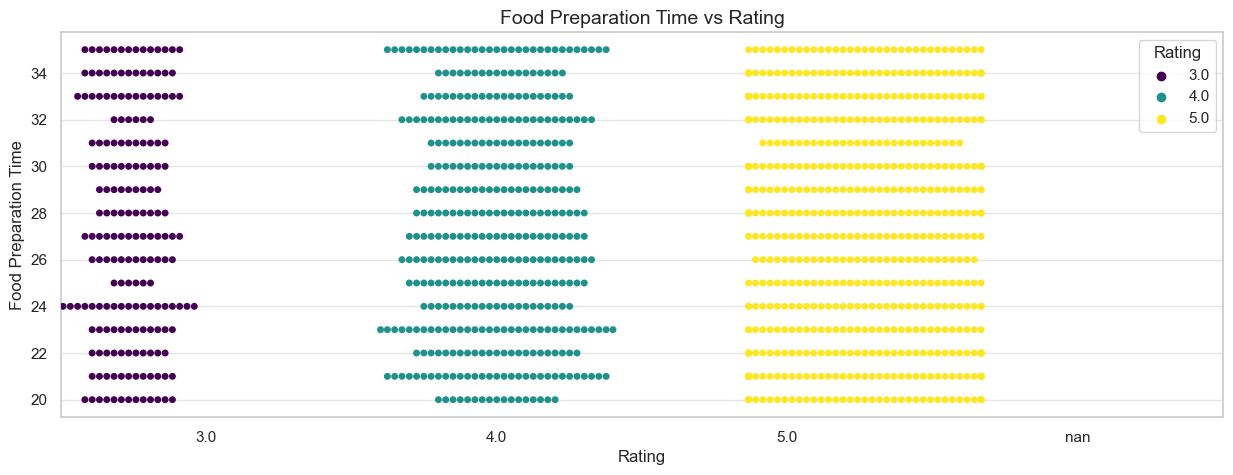

In [98]:
plt.figure(figsize=(15, 5))
sns.swarmplot(
    data=df,
    x='rating',
    y='food_preparation_time',
    hue='rating',
    dodge=True,
    palette='viridis'
)
plt.title('Food Preparation Time vs Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Food Preparation Time', fontsize=12)
plt.legend(title='Rating')
plt.show()


Obsv1

We can see that many people have rated 5 regardless of Food Preparation Time. Also similar behavior is seen for ratin 4 too

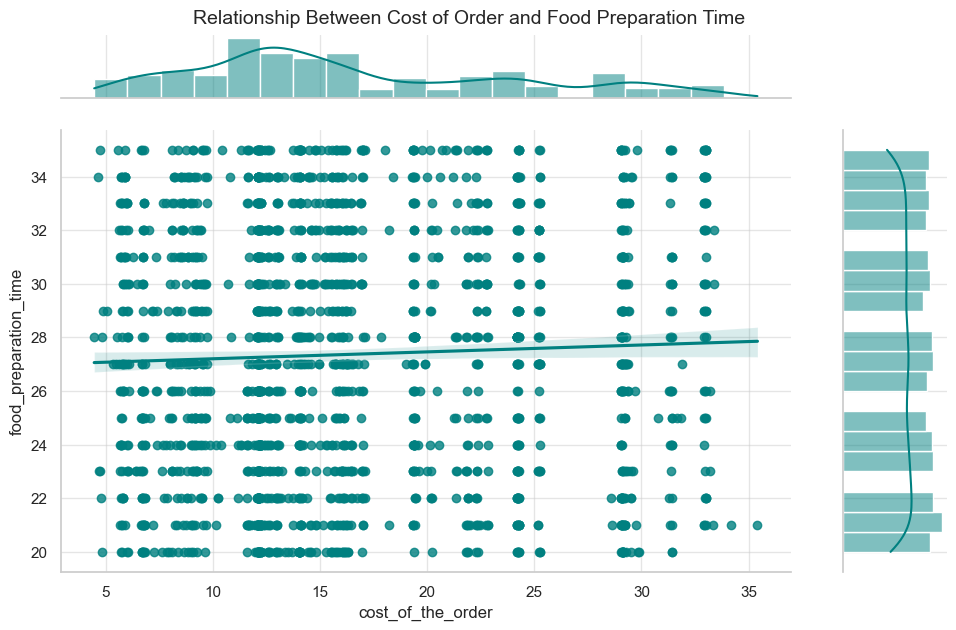

In [117]:
g = sns.jointplot(
    data=df,
    x='cost_of_the_order',
    y='food_preparation_time',
    kind='reg',  # Regression plot
    height=8,    # Figure size
    space=0.5,   # Space between main plot and marginal plots
    marginal_kws={'bins': 20, 'fill': True},  # Styling marginal histograms
    color='teal'
)
plt.suptitle('Relationship Between Cost of Order and Food Preparation Time',
             y=1.02, fontsize=14)
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
plt.show()

Obsv1

The distribution of food preparation times is fairly uniform, with no significant peaks or concentrations at any particular time range. This indicates that preparation times are consistent across all orders, with no noticeable trend or bias toward faster or slower preparations

Obsv2

The distribution of order costs is right-skewed, meaning that most orders are relatively inexpensive, with fewer orders having significantly higher costs. This suggests that while the majority of customers are making lower-cost orders, there are a few large or multiple-item orders that are driving the higher cost values

<Figure size 1500x500 with 0 Axes>

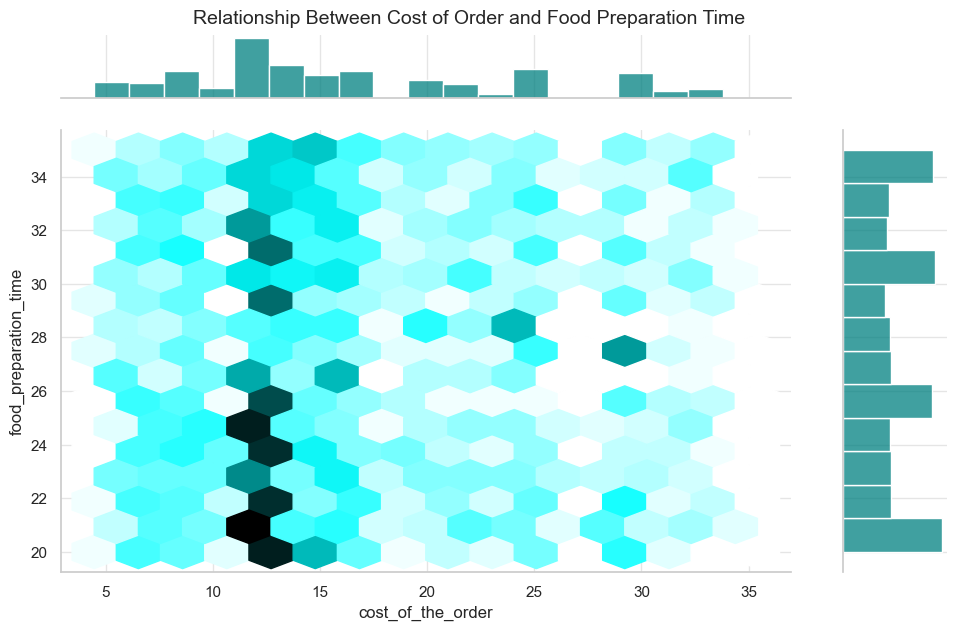

In [171]:
plt.figure(figsize=(15, 5))
g = sns.jointplot(
    data=df,
    x='cost_of_the_order',
    y='food_preparation_time',
    kind='hex',  # Scatter plot
    height=8,    # Figure size
    space= 0.5,   # Space between main plot and marginal plots
    #marginal_kws={'bins': 20},  # Styling marginal histograms
    color='teal'
)
plt.suptitle('Relationship Between Cost of Order and Food Preparation Time',
             y=1.02, fontsize=14)
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
plt.show()

Observation 

The hex plot reveals that the majority of orders, especially the higher frequency ones, tend to have lower costs and relatively shorter food preparation times. However, there are some instances of low-cost orders that took significantly longer to prepare, suggesting that while most orders follow this trend, there are exceptions with longer preparation times for certain cost-effective items.

<Figure size 1500x500 with 0 Axes>

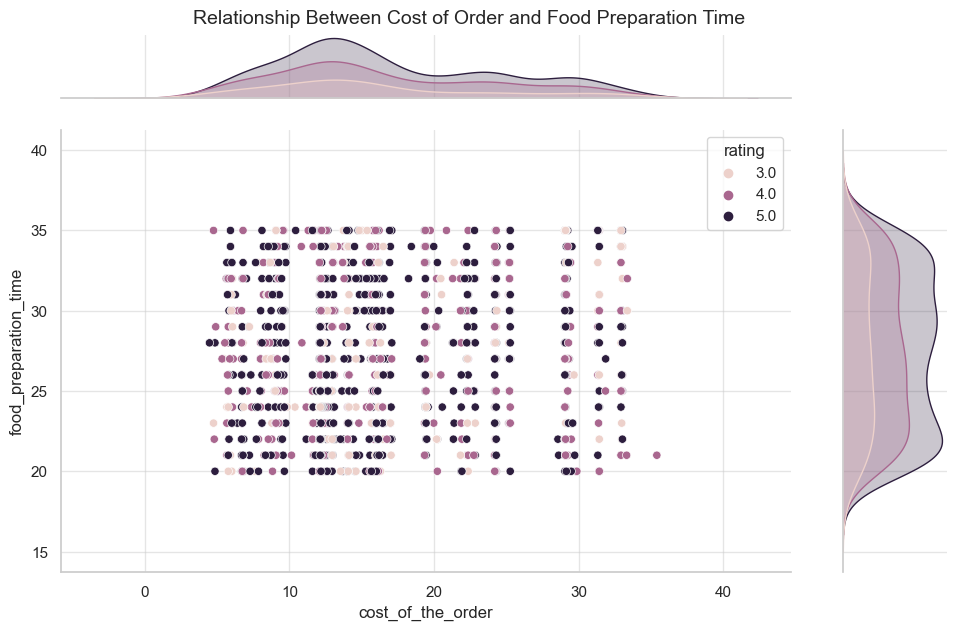

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.jointplot(
    data=df,
    x='cost_of_the_order',
    y='food_preparation_time',
    #kind='reg',  # Regression plot
    kind='scatter',  # Scatter plot
    height=8,    # Figure size
    hue='rating',
    space= 0.5,   # Space between main plot and marginal plots
    #marginal_kws={'bins': 20},  # Styling marginal histograms
    color='teal'
)
plt.suptitle('Relationship Between Cost of Order and Food Preparation Time',
             y=1.02, fontsize=14)
g.figure.set_figwidth(10)
g.figure.set_figheight(6)
plt.show()

Obsv1. 

The scatter plot reveals that orders across all ratings are spread out across both preparation time and order cost. This indicates that there's no clear pattern linking the rating to either the time taken for preparation or the cost of the order. In other words, the ratings don't seem to depend on how long the food takes to prepare or how much it costs.
Note: here we are ignoring the orders where ratings are not provided

Obsv2. 

Orders with a rating of 5 show some unusual patterns compared to those rated 3 and 4. Specifically, these orders tend to have a higher or more varied cost and food preparation time, which isn’t as consistent in the lower-rated orders. This suggests that while customers may give a perfect rating, these orders might involve more complex or expensive meals, leading to less predictability in how much they cost or how long they take to prepare

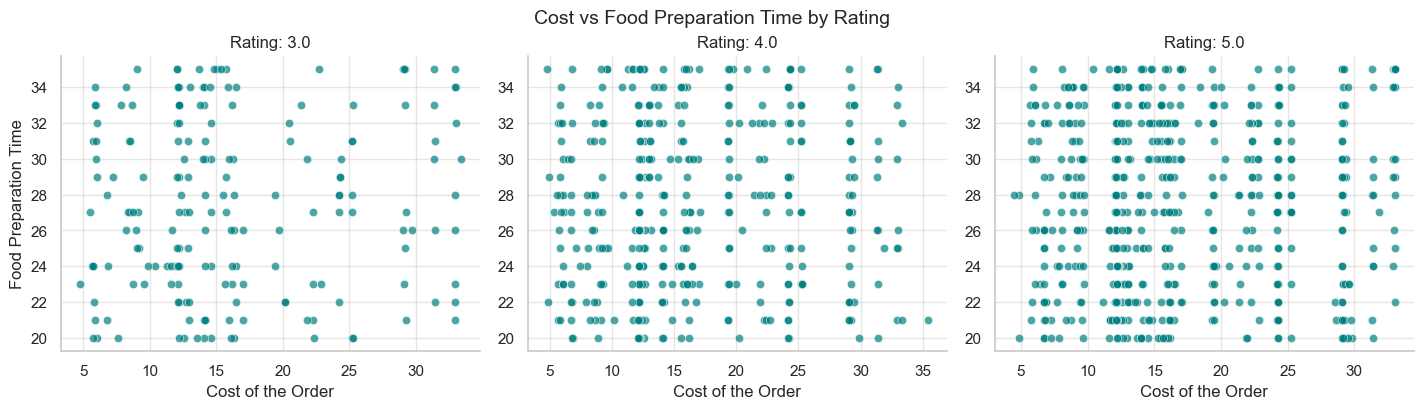

In [127]:
g = sns.FacetGrid(df, col='rating', col_wrap=3, height=4, aspect=1.2, sharex=False, sharey=False)
g.map(sns.scatterplot, 'cost_of_the_order', 'food_preparation_time', alpha=0.7, color='teal')
g.set_titles("Rating: {col_name}")
g.set_axis_labels("Cost of the Order", "Food Preparation Time")
g.figure.suptitle('Cost vs Food Preparation Time by Rating', y=1.02, fontsize=14)
plt.show()

Obsv

- People ratings 4 or 5 to an order seems to place more low cost or nominal cost order.
- People raiting 3 seems not to have concerns primarily with cost but other aspects of order.

Hence From the scatter plot, it appears that customers who rated their orders 4 or 5 tend to order lower-cost items, regardless of the preparation time. On the other hand, customers who rated their orders with a 3 seem to prioritize factors other than cost, indicating that they may be less concerned with the price and more focused on other aspects of their order, such as quality or service.

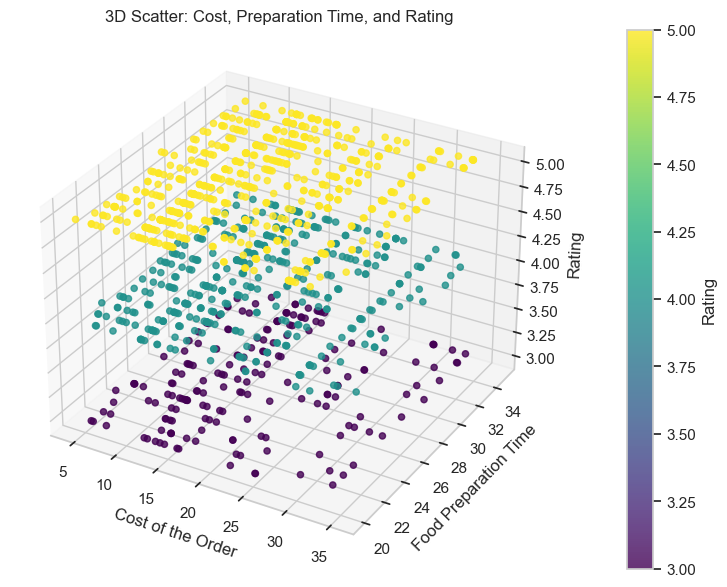

In [126]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df['cost_of_the_order'],
    df['food_preparation_time'],
    df['rating'],
    c=df['rating'], cmap='viridis', alpha=0.8
)

# Axis labels
ax.set_xlabel('Cost of the Order')
ax.set_ylabel('Food Preparation Time')
ax.set_zlabel('Rating')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Rating')

plt.title('3D Scatter: Cost, Preparation Time, and Rating')
plt.show()


Obsv. 

In the 3D plot, the points representing orders with a 5-star rating are more evenly distributed across both food preparation time and cost, indicating a uniform pattern in customer choices. In contrast, the 3-star rating plane shows a noticeable gap between the clustered points, suggesting that these customers might have more varied preferences or that there is a specific factor influencing their decisions differently than those who gave higher ratings.

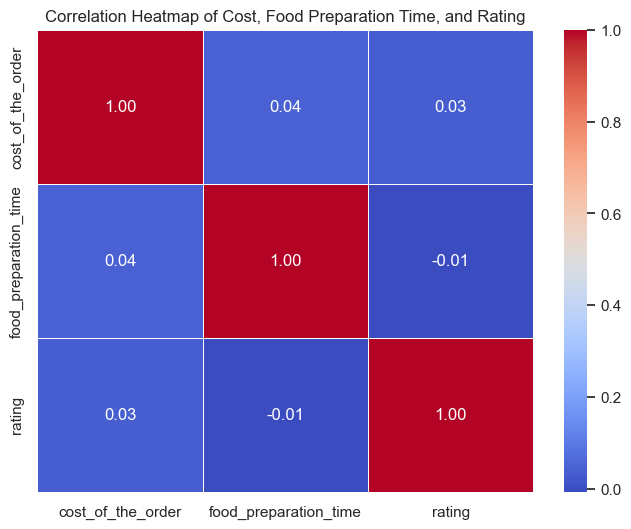

In [ ]:
# Calculate correlation matrix
# todo: use appropriate name whilst doing in actual nb
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'rating']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Cost, Food Preparation Time, and Rating')
plt.show()

Obsv1

The correlations between cost, preparation time, and rating are all very weak, indicating that these factors are largely independent of each other. This suggests that other factors, such as food quality, service, and customer expectations, may play a more significant role in determining customer satisfaction and ratings.

---

## Descriptive Statistics

In [128]:
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                     25   
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday     4.0                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [148]:
# Que
# The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

# ! Intentionally 1st step is commented and not removed, because already rating column is imputed earlier in Section1 (ie Understanding the Dataset)
# ! But not removing this below 2 lines because in future it should be known & asserted that removing na is crucial for answering above que without any inaccuracy
# 1. Fill missing ratings with a default value if necessary, or you can skip rows with missing ratings
# df_clean = df.dropna(subset=['rating'])

# ? Assumption - at this point column 'rating' has no missing values & it's type is numeric

# 2. Group by restaurant name and calculate the count of ratings and the average rating
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# 3. Filter restaurants based on the criteria: count > 50 and mean > 4
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# 4. Display the eligible restaurants
tableit_df(eligible_restaurants, show_index=True)

+---------------------------+-------+--------------------+
|      restaurant_name      | count |        mean        |
+---------------------------+-------+--------------------+
| Blue Ribbon Fried Chicken | 64.0  |      4.328125      |
|     Blue Ribbon Sushi     | 73.0  | 4.219178082191781  |
|        Shake Shack        | 133.0 | 4.2781954887218046 |
|     The Meatball Shop     | 84.0  | 4.511904761904762  |
+---------------------------+-------+--------------------+


In [159]:
print('Eligible Restaurants for Promotional Offer:')
pprint(eligible_restaurants.index.to_list())

Eligible Restaurants for Promotional Offer:
['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop']


**Observation/Note** :

The following restaurants meet the criteria of having more than 50 ratings and an average rating greater than 4:

1. **_Blue Ribbon Fried Chicken_** - avg rating: `4.33` (**64** ratings)
2. **_Blue Ribbon Sushi_**         - avg rating: `4.22` (**73** ratings)
3. **_Shake Shack_**               – avg rating: `4.28` (**133** ratings)
4. **_The Meatball Shop_**         – avg rating: `4.51` (**84** ratings)

These restaurants are eligible for the promotional offer as they consistently receive high ratings from a significant number of customers.



In [149]:
eligible_restaurants

count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

In [ ]:
#Que
#The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

def calculate_revenue(row):
    ''' Calculate revenue based on cost of order'''
    # ? NOTE : the unit of currency is dollar
    match row['cost_of_the_order']:
        case cost if cost > 20: # more than 20 dollar
            return cost * 0.25
        case cost if cost > 5:  # more than 5 dollar
            return cost * 0.15
        case _:                 # less than or equal to 5 dollar
            return 0

# Apply the function to each row and calculate the total revenue
orders_revenue = df.apply(calculate_revenue, axis=1)

# Calculate total net revenue generated
total_revenue = orders_revenue.sum()

# Display the total revenue
print(f"Total Net Revenue Generated by the Company across all orders is: ${total_revenue:.2f}")


Total Net Revenue Generated by the Company across all orders is: $6166.30


In [161]:
# Que
# The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

# Calculate total time = (food preparation time + delivery time)
order_total_delivery_time = df['food_preparation_time'] + df['delivery_time']

# Find percentage of orders taking more than 60 minutes
percentage_orders_above_60min = (order_total_delivery_time > 60).mean() * 100

# Result
print(f"Percentage of orders taking more than 60 minutes from the time the order is placed is: {percentage_orders_above_60min:.2f}%")

Percentage of orders taking more than 60 minutes from the time the order is placed is: 10.54%


In [168]:
# Que
# The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

# ? Intentionally commented below LOC, as question asks only mean time so not using below but
# ? It can be used to get idea about other statistic (ie describe() :- descriptive statistic), if needed in future
# -
# Group by 'day_of_the_week'
# delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time']

mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Result
# print(mean_delivery_time_by_day)
tableit(mean_delivery_time_by_day)

+-----------------+---------+
| delivery_time   |   value |
+=================+=========+
| Weekday         |   28.34 |
+-----------------+---------+
| Weekend         |   22.47 |
+-----------------+---------+


In [169]:
mean_delivery_time_by_day

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Observation / Note**:

The mean delivery time on weekdays is 28.34 minutes, whereas on weekends it is 22.47 minutes. This shows that delivery times are generally longer on weekdays compared to weekends, with a difference of approximately 5.87 minutes. This could indicate that there are more delays or possibly higher demand for deliveries during weekdays.

---